In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [15]:
df=pd.read_csv("Customer-Value-Analysis.csv")

In [16]:
df.shape

(9134, 24)

In [17]:
df.head(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [18]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [19]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [20]:
df.tail(10)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9124,CB59349,California,16261.585500,No,Extended,Master,1/20/11,Employed,M,60646,...,42,0,2,Personal Auto,Personal L3,Offer2,Agent,643.200000,SUV,Medsize
9125,RX91025,California,19872.262000,No,Premium,High School or Below,1/31/11,Unemployed,M,0,...,35,0,2,Personal Auto,Personal L3,Offer1,Agent,1950.725547,SUV,Small
9126,AC13887,California,4628.995325,No,Basic,Bachelor,1/9/11,Unemployed,M,0,...,21,0,4,Corporate Auto,Corporate L1,Offer1,Branch,482.400000,Two-Door Car,Medsize
9127,TF56202,California,5032.165498,No,Basic,College,2/12/11,Employed,M,66367,...,48,0,3,Personal Auto,Personal L3,Offer2,Call Center,307.200000,Two-Door Car,Small
9128,YM19146,California,4100.398533,No,Premium,College,1/6/11,Employed,F,47761,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [22]:
Response=df.groupby('Response').count()
Response

,Customer,State,Customer Lifetime Value,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Response,,,,,,,,,,,,,,,,,,,,,
No,7826,7826,7826,7826,7826,7826,7826,7826,7826,7826,...,7826,7826,7826,7826,7826,7826,7826,7826,7826,7826
Yes,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308,...,1308,1308,1308,1308,1308,1308,1308,1308,1308,1308


Text(0, 0.5, 'Count')

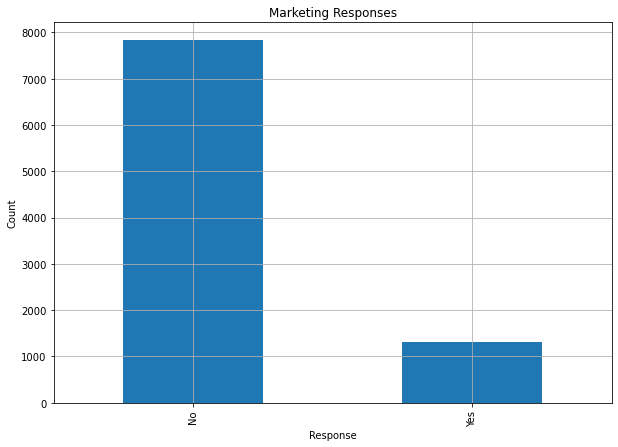

In [23]:
df.groupby('Response')['Customer'].count().plot(kind='bar', grid=True,
figsize=(10, 7),
title='Marketing Responses').set_ylabel('Count')

In [24]:
categorical_var=['State', 'Response', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender',
       'Marital Status', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size']

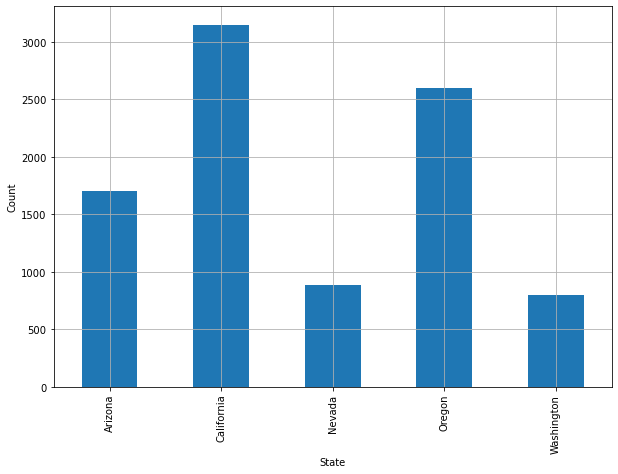

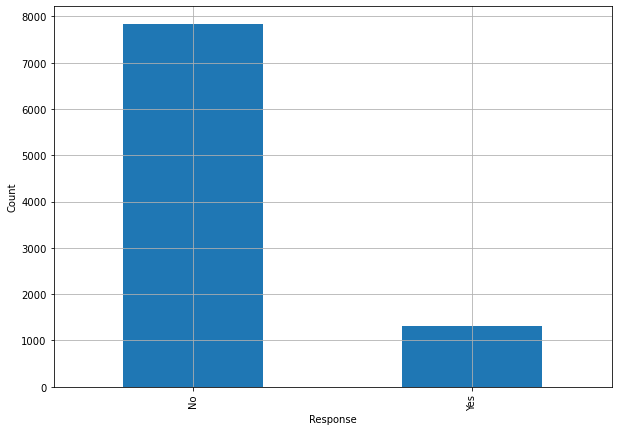

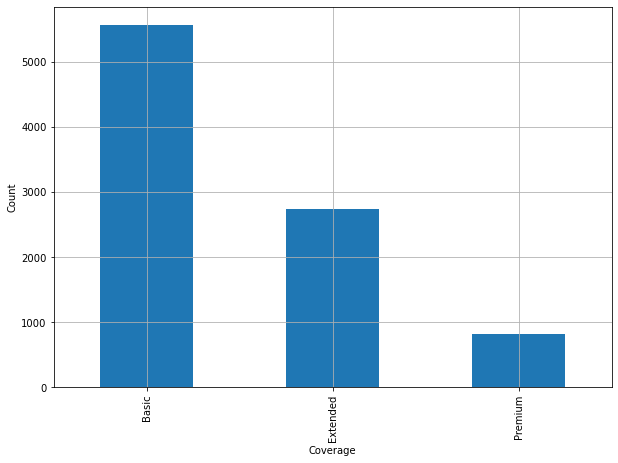

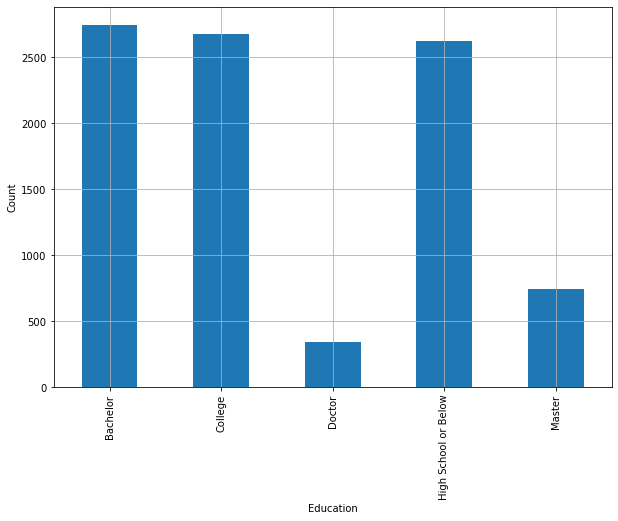

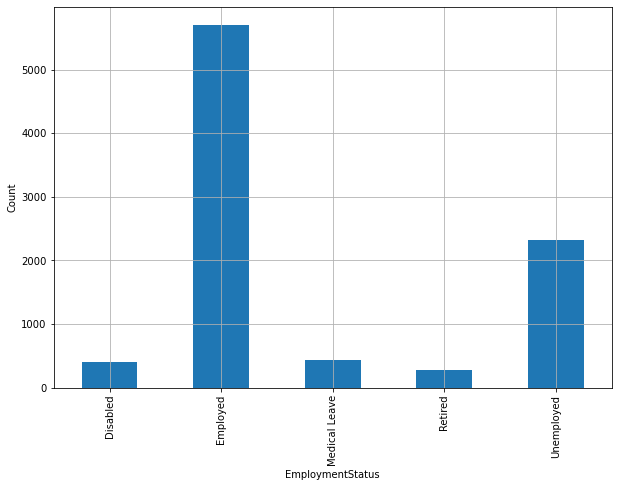

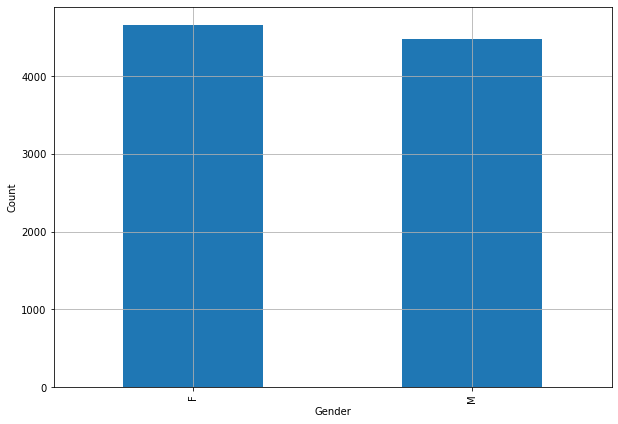

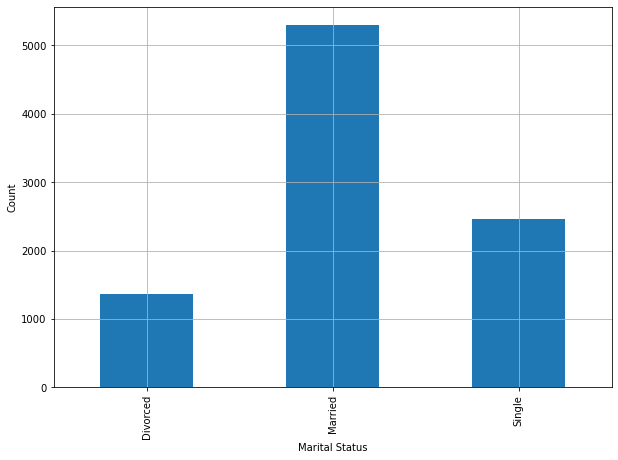

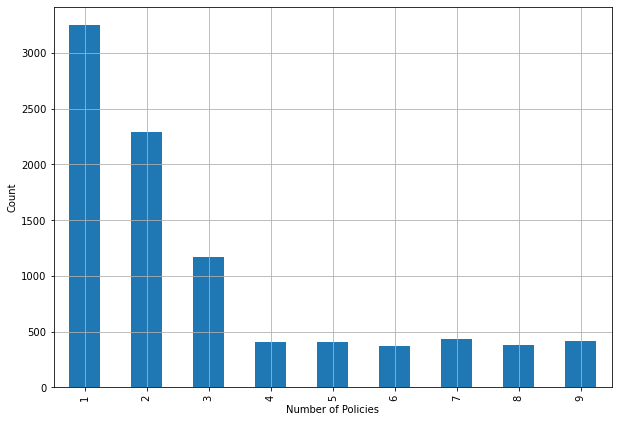

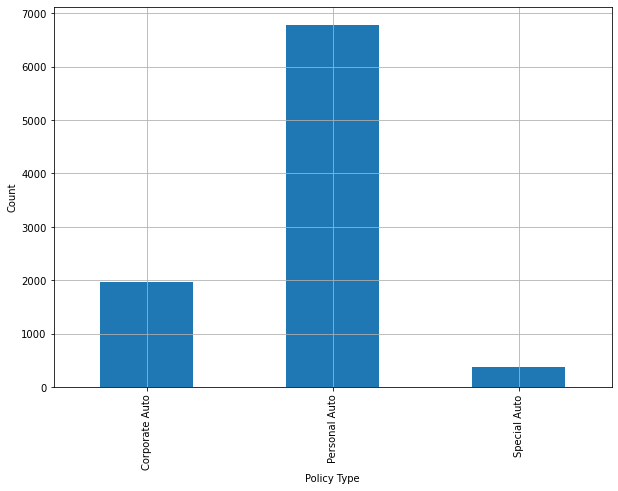

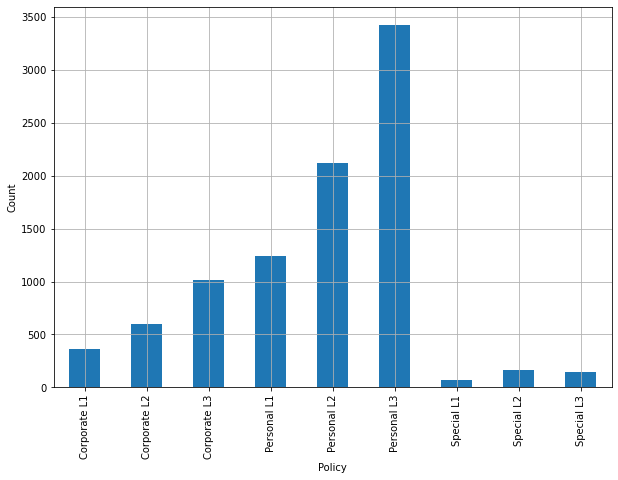

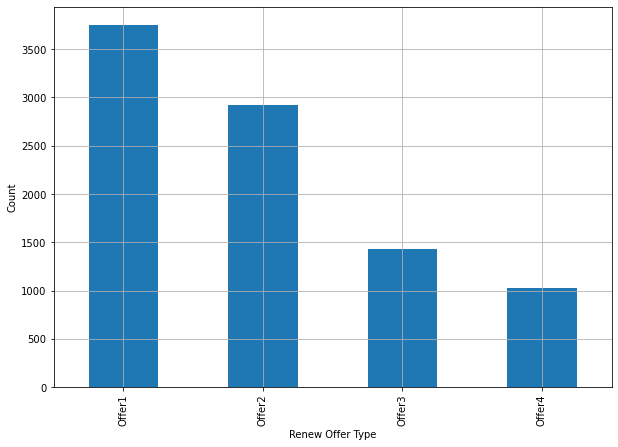

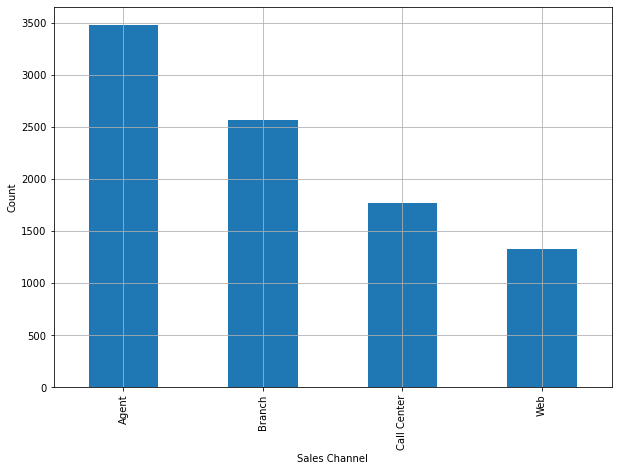

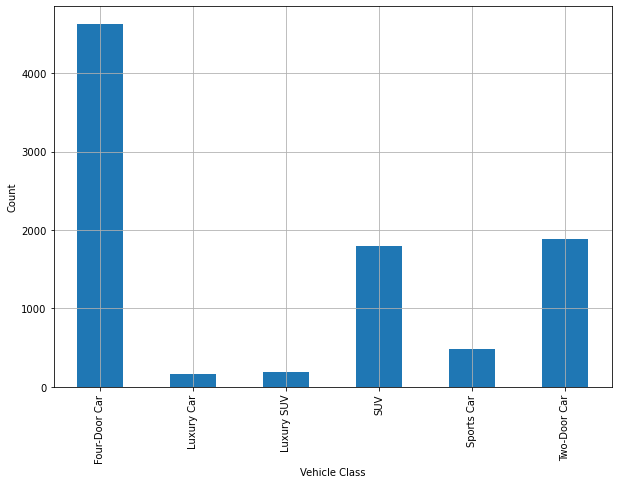

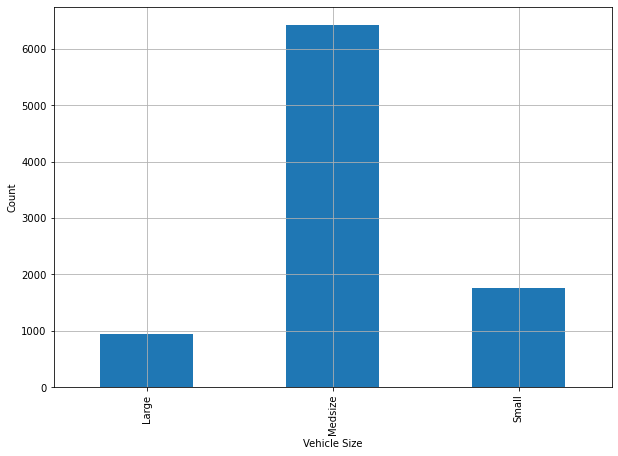

In [25]:
for i in categorical_var:
    df.groupby(i)['Customer'].count().plot(kind='bar', grid=True,
    figsize=(10, 7)).set_ylabel('Count')
    plt.show()

In [26]:
categorical_var.remove('Response')
categorical_var


['State',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Marital Status',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

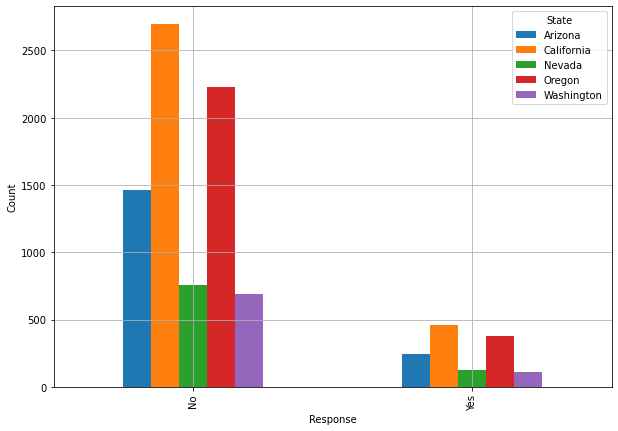

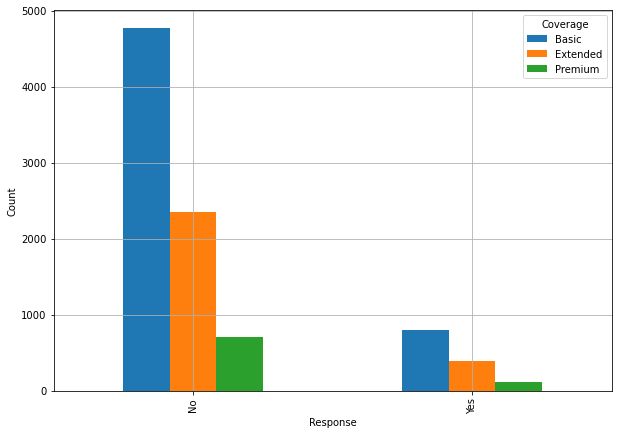

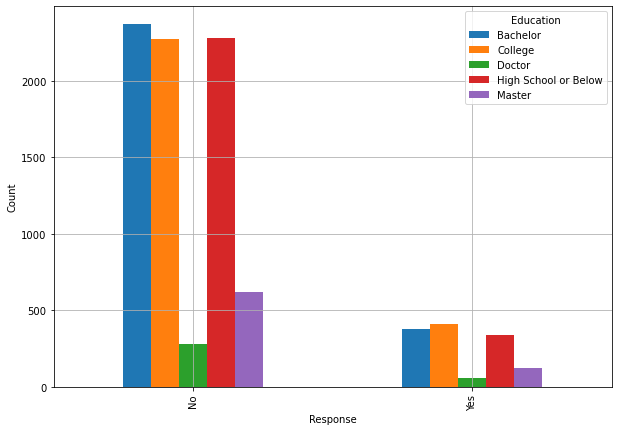

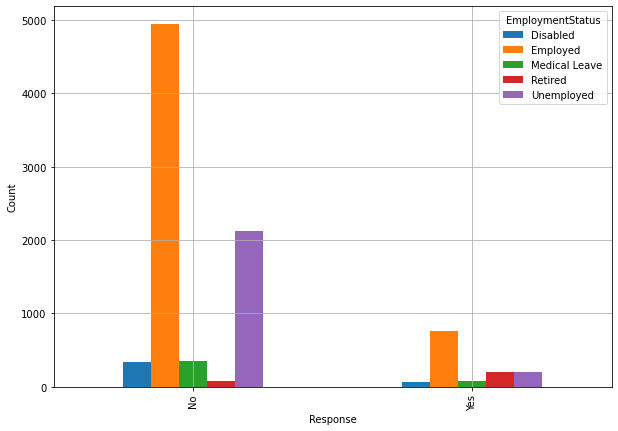

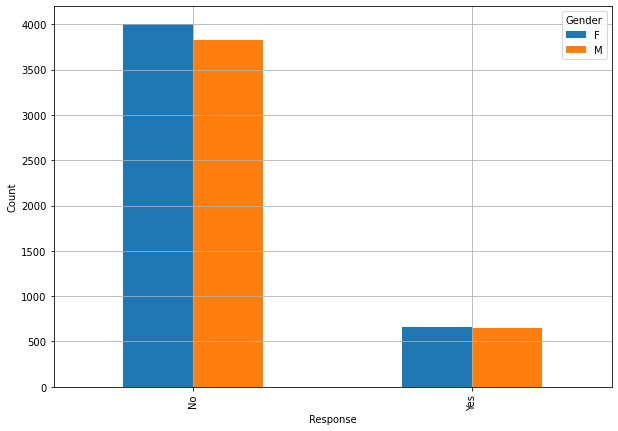

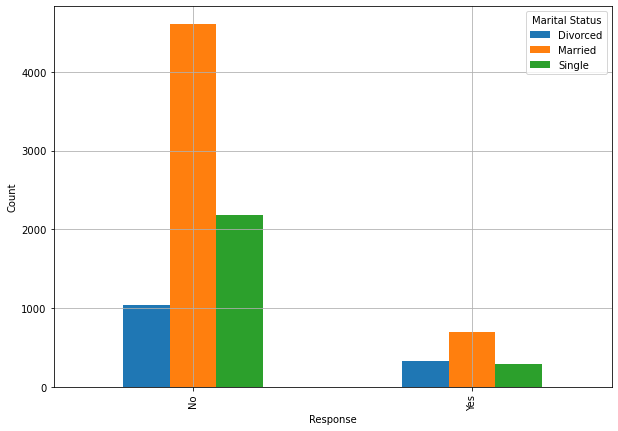

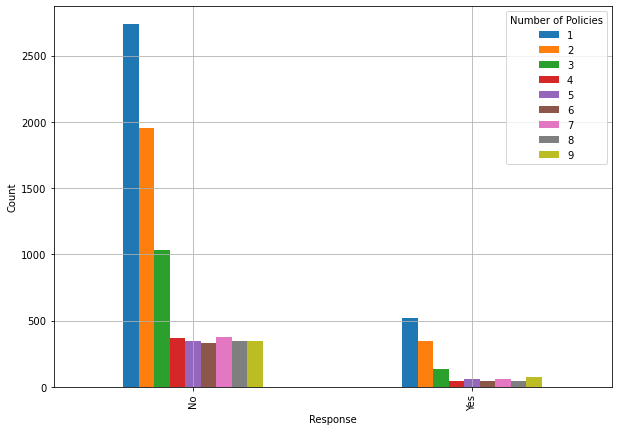

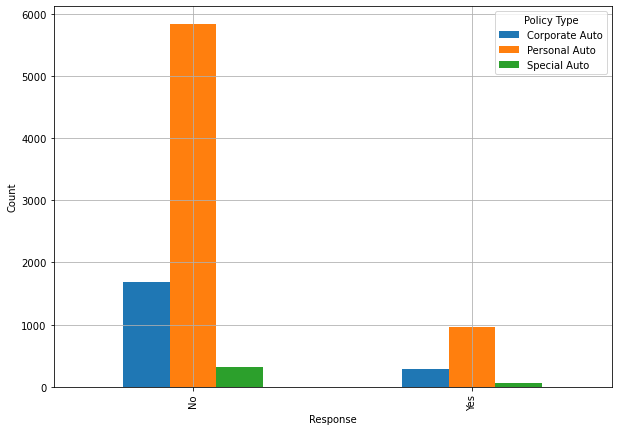

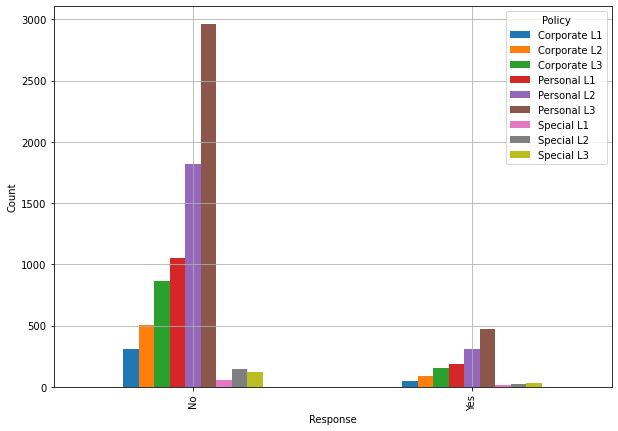

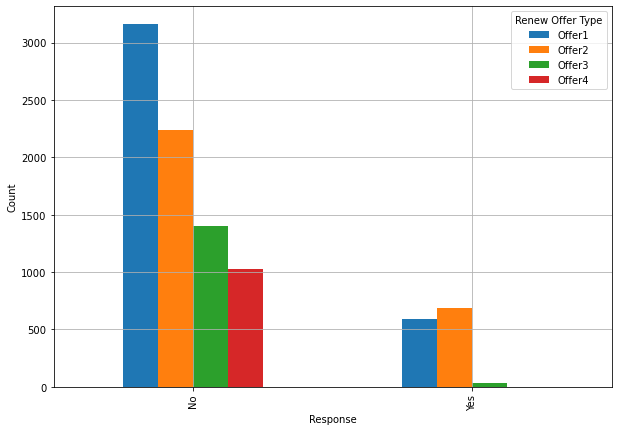

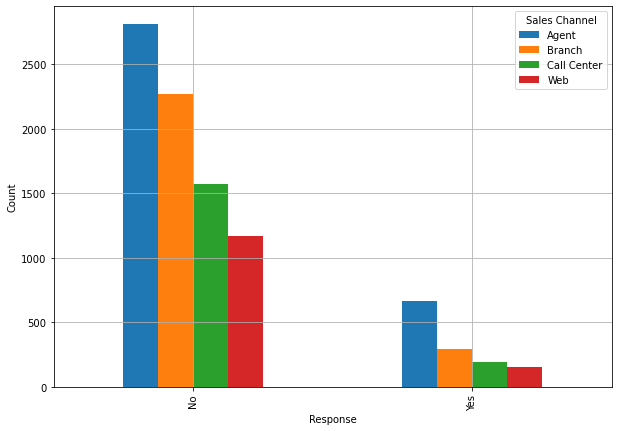

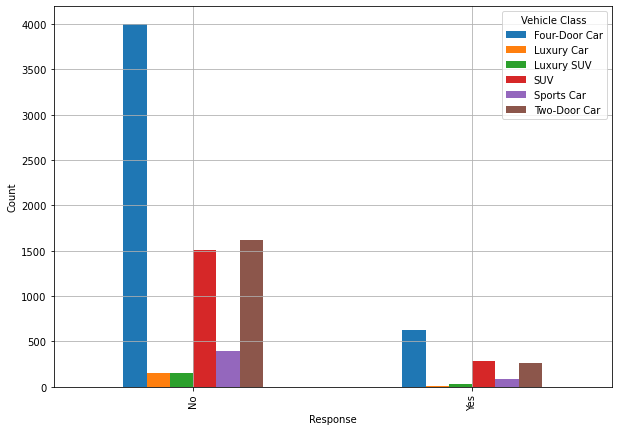

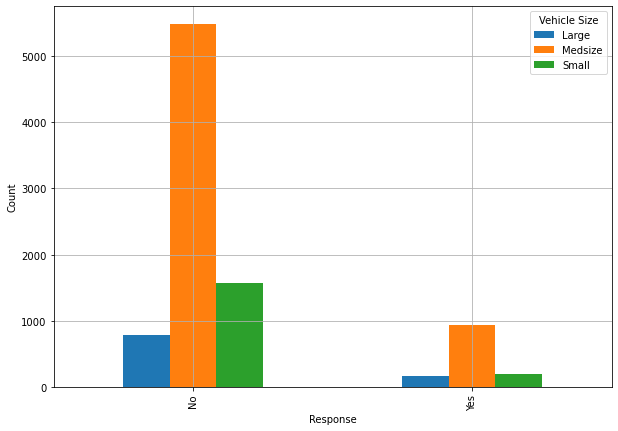

In [27]:
for i in categorical_var:
    cat_vs_cat=df.groupby(['Response', i])['Customer'].count()
    cat_vs_cat = cat_vs_cat.unstack().fillna(0)
    ax = (cat_vs_cat).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
    )
    ax.set_ylabel('Count')
    plt.show()


In [28]:
Education_vs_Emp=df[df['Response']=='Yes'].groupby(['Education', 'EmploymentStatus'])['Customer'].count()
Education_vs_Emp

Education             EmploymentStatus
Bachelor              Disabled             24
                      Employed            216
                      Medical Leave        18
                      Retired              66
                      Unemployed           54
College               Employed            222
                      Medical Leave        36
                      Retired              78
                      Unemployed           72
Doctor                Disabled              6
                      Employed             48
                      Unemployed            6
High School or Below  Disabled             24
                      Employed            192
                      Medical Leave        24
                      Retired              48
                      Unemployed           54
Master                Disabled             18
                      Employed             78
                      Retired              12
                      Unemployed         

In [29]:
Education_vs_Emp = Education_vs_Emp.unstack().fillna(0)
Education_vs_Emp

EmploymentStatus,Disabled,Employed,Medical Leave,Retired,Unemployed
Education,,,,,
Bachelor,24.0,216.0,18.0,66.0,54.0
College,0.0,222.0,36.0,78.0,72.0
Doctor,6.0,48.0,0.0,0.0,6.0
High School or Below,24.0,192.0,24.0,48.0,54.0
Master,18.0,78.0,0.0,12.0,12.0


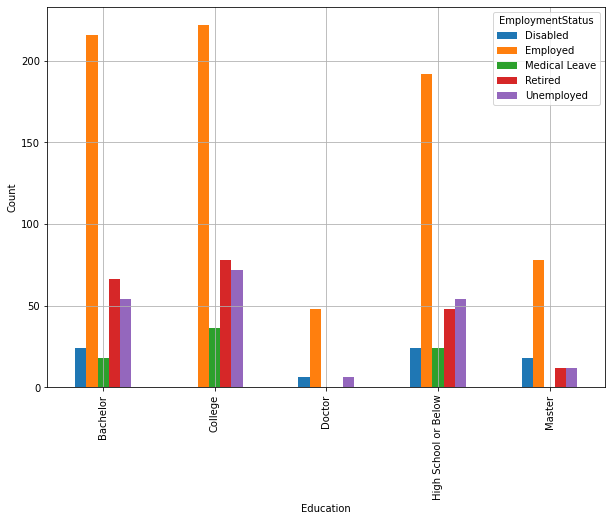

In [30]:
# Visualize this data in bar plot
ax = (Education_vs_Emp).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [31]:
Offer_vs_Channel=df[df['Response']=='Yes'].groupby(['Renew Offer Type', 'Sales Channel'])['Customer'].count()
Offer_vs_Channel

Renew Offer Type  Sales Channel
Offer1            Agent            336
                  Branch           168
                  Call Center       42
                  Web               48
Offer2            Agent            312
                  Branch           126
                  Call Center      150
                  Web               96
Offer3            Agent             18
                  Web               12
Name: Customer, dtype: int64

In [32]:
Offer_vs_Channel = Offer_vs_Channel.unstack().fillna(0)
Offer_vs_Channel

Sales Channel,Agent,Branch,Call Center,Web
Renew Offer Type,,,,
Offer1,336.0,168.0,42.0,48.0
Offer2,312.0,126.0,150.0,96.0
Offer3,18.0,0.0,0.0,12.0


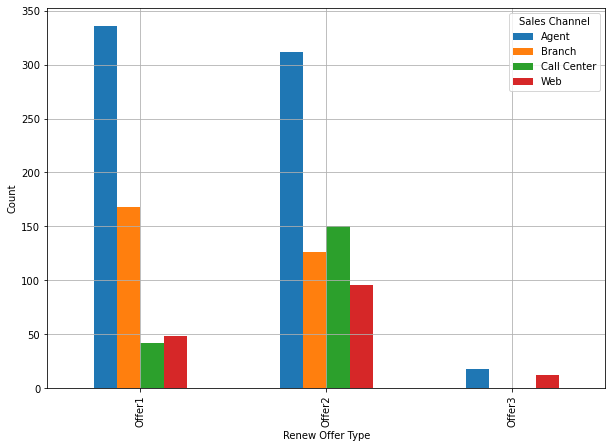

In [33]:
# Visualize this data in bar plot
ax = (Offer_vs_Channel).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [34]:
Vehicle_vs_Size=df[df['Response']=='Yes'].groupby(['Vehicle Class', 'Vehicle Size'])['Customer'].count()
Vehicle_vs_Size

Vehicle Class  Vehicle Size
Four-Door Car  Large            84
               Medsize         438
               Small           102
Luxury Car     Medsize           6
               Small             6
Luxury SUV     Medsize          24
               Small             6
SUV            Large            36
               Medsize         216
               Small            36
Sports Car     Large            12
               Medsize          78
Two-Door Car   Large            36
               Medsize         180
               Small            48
Name: Customer, dtype: int64

In [35]:
Vehicle_vs_Size = Vehicle_vs_Size.unstack().fillna(0)
Vehicle_vs_Size

Vehicle Size,Large,Medsize,Small
Vehicle Class,,,
Four-Door Car,84.0,438.0,102.0
Luxury Car,0.0,6.0,6.0
Luxury SUV,0.0,24.0,6.0
SUV,36.0,216.0,36.0
Sports Car,12.0,78.0,0.0
Two-Door Car,36.0,180.0,48.0


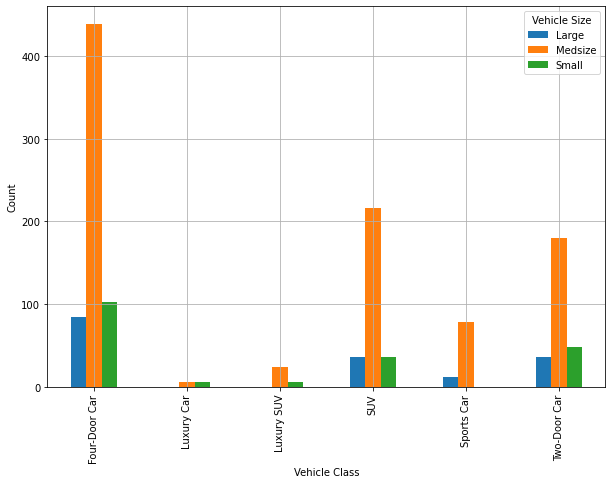

In [36]:
# Visualize this data in bar plot
ax = (Vehicle_vs_Size).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [37]:
offer_vs_vclass=df[df['Response']=='Yes'].groupby(['Renew Offer Type', 'Vehicle Class'])['Customer'].count()
offer_vs_vclass

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    264
                  Luxury Car         6
                  Luxury SUV        18
                  SUV              168
                  Sports Car        42
                  Two-Door Car      96
Offer2            Four-Door Car    336
                  Luxury Car         6
                  Luxury SUV        12
                  SUV              120
                  Sports Car        48
                  Two-Door Car     162
Offer3            Four-Door Car     24
                  Two-Door Car       6
Name: Customer, dtype: int64

In [38]:
offer_vs_vclass = offer_vs_vclass.unstack().fillna(0)
offer_vs_vclass

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,264.0,6.0,18.0,168.0,42.0,96.0
Offer2,336.0,6.0,12.0,120.0,48.0,162.0
Offer3,24.0,0.0,0.0,0.0,0.0,6.0


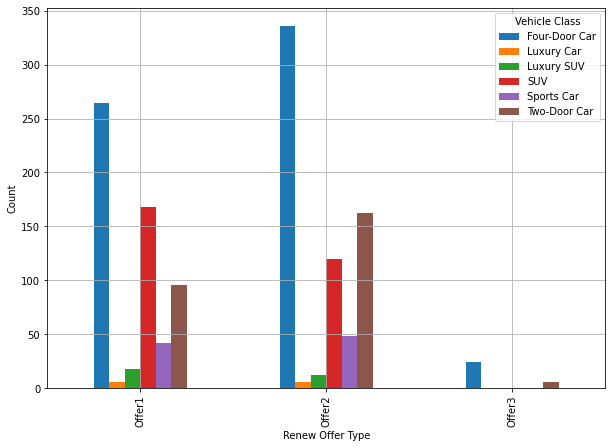

In [39]:
# Visualize this data in bar plot
ax = (offer_vs_vclass).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [40]:
channel_vs_vclass=df[df['Response']=='Yes'].groupby(['Sales Channel', 'Vehicle Class'])['Customer'].count()
channel_vs_vclass

Sales Channel  Vehicle Class
Agent          Four-Door Car    306
               Luxury Car         6
               Luxury SUV        30
               SUV              144
               Sports Car        48
               Two-Door Car     132
Branch         Four-Door Car    132
               Luxury Car         6
               SUV               90
               Sports Car        24
               Two-Door Car      42
Call Center    Four-Door Car    108
               SUV               30
               Two-Door Car      54
Web            Four-Door Car     78
               SUV               24
               Sports Car        18
               Two-Door Car      36
Name: Customer, dtype: int64

In [41]:
channel_vs_vclass = channel_vs_vclass.unstack().fillna(0)
channel_vs_vclass

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Sales Channel,,,,,,
Agent,306.0,6.0,30.0,144.0,48.0,132.0
Branch,132.0,6.0,0.0,90.0,24.0,42.0
Call Center,108.0,0.0,0.0,30.0,0.0,54.0
Web,78.0,0.0,0.0,24.0,18.0,36.0


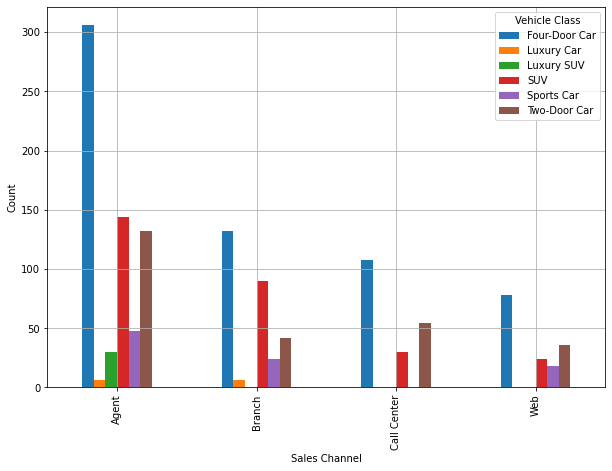

In [42]:
# Visualize this data in bar plot
ax = (channel_vs_vclass).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [44]:
channel_vs_gender=df[df['Response']=='Yes'].groupby(['Sales Channel', 'Gender'])['Customer'].count()
channel_vs_gender

Sales Channel  Gender
Agent          F         324
               M         342
Branch         F         144
               M         150
Call Center    F          96
               M          96
Web            F          96
               M          60
Name: Customer, dtype: int64

In [45]:
channel_vs_gender = channel_vs_gender.unstack().fillna(0)
channel_vs_gender

Gender,F,M
Sales Channel,,
Agent,324,342
Branch,144,150
Call Center,96,96
Web,96,60


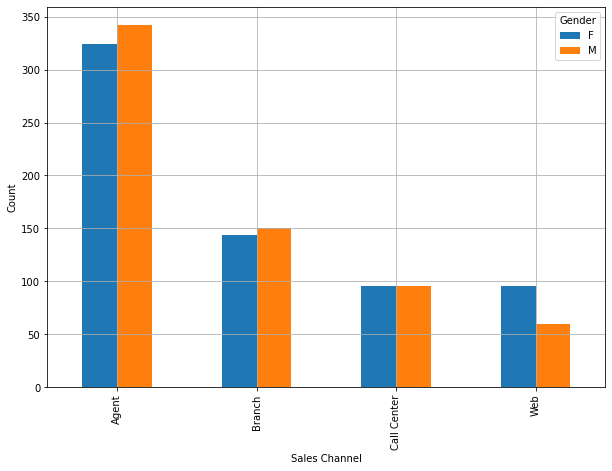

In [46]:
# Visualize this data in bar plot
ax = (channel_vs_gender).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [47]:
offer_vs_gender=df[df['Response']=='Yes'].groupby(['Renew Offer Type', 'Gender'])['Customer'].count()
offer_vs_gender

Renew Offer Type  Gender
Offer1            F         306
                  M         288
Offer2            F         348
                  M         336
Offer3            F           6
                  M          24
Name: Customer, dtype: int64

In [48]:
offer_vs_gender = offer_vs_gender.unstack().fillna(0)
offer_vs_gender

Gender,F,M
Renew Offer Type,,
Offer1,306,288
Offer2,348,336
Offer3,6,24


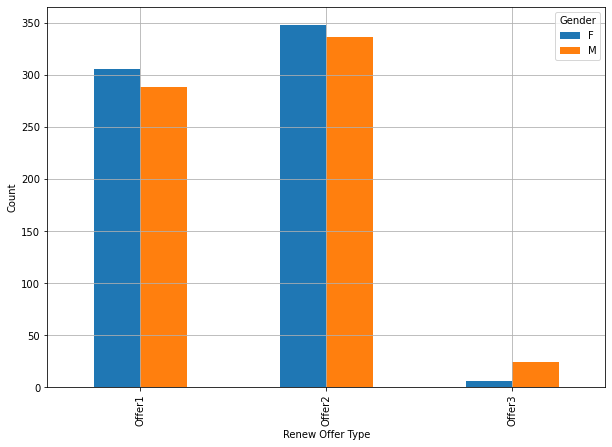

In [49]:
# Visualize this data in bar plot
ax = (offer_vs_gender).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()


In [50]:
channel_vs_mstatus=df[df['Response']=='Yes'].groupby(['Sales Channel', 'Marital Status'])['Customer'].count()
channel_vs_mstatus

Sales Channel  Marital Status
Agent          Divorced          162
               Married           354
               Single            150
Branch         Divorced           66
               Married           174
               Single             54
Call Center    Divorced           48
               Married           102
               Single             42
Web            Divorced           48
               Married            66
               Single             42
Name: Customer, dtype: int64

In [51]:
channel_vs_mstatus = channel_vs_mstatus.unstack().fillna(0)
channel_vs_mstatus

Marital Status,Divorced,Married,Single
Sales Channel,,,
Agent,162,354,150
Branch,66,174,54
Call Center,48,102,42
Web,48,66,42


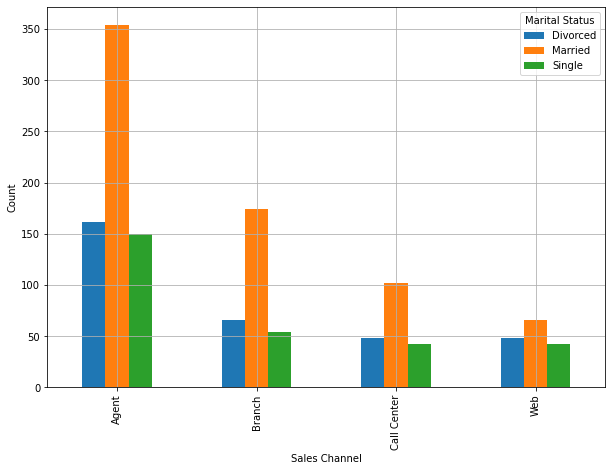

In [52]:
# Visualize this data in bar plot
ax = (channel_vs_mstatus).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()


In [53]:
offer_vs_mstatus=df[df['Response']=='Yes'].groupby(['Renew Offer Type', 'Marital Status'])['Customer'].count()
offer_vs_mstatus

Renew Offer Type  Marital Status
Offer1            Divorced          198
                  Married           228
                  Single            168
Offer2            Divorced          126
                  Married           438
                  Single            120
Offer3            Married            30
Name: Customer, dtype: int64

In [54]:
offer_vs_mstatus = offer_vs_mstatus.unstack().fillna(0)
offer_vs_mstatus

Marital Status,Divorced,Married,Single
Renew Offer Type,,,
Offer1,198.0,228.0,168.0
Offer2,126.0,438.0,120.0
Offer3,0.0,30.0,0.0


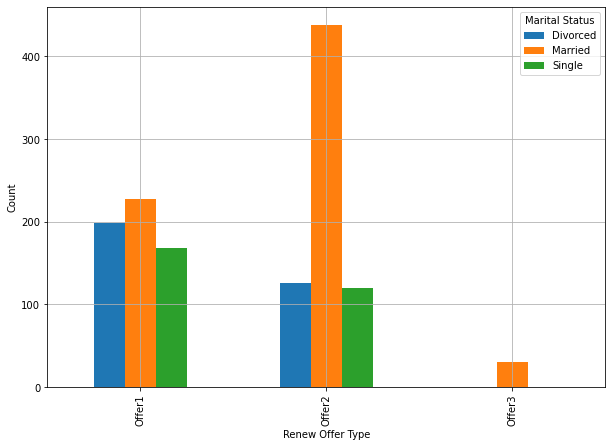

In [55]:
# Visualize this data in bar plot
ax = (offer_vs_mstatus).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [56]:
gender_vs_mstatus=df[df['Response']=='Yes'].groupby(['Gender', 'Marital Status'])['Customer'].count()
gender_vs_mstatus

Gender  Marital Status
F       Divorced          192
        Married           336
        Single            132
M       Divorced          132
        Married           360
        Single            156
Name: Customer, dtype: int64

In [57]:
gender_vs_mstatus = gender_vs_mstatus.unstack().fillna(0)
gender_vs_mstatus

Marital Status,Divorced,Married,Single
Gender,,,
F,192,336,132
M,132,360,156


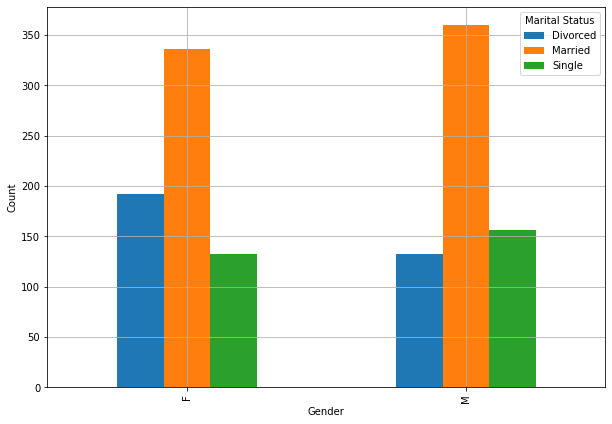

In [58]:
# Visualize this data in bar plot
ax = (gender_vs_mstatus).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()


In [59]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


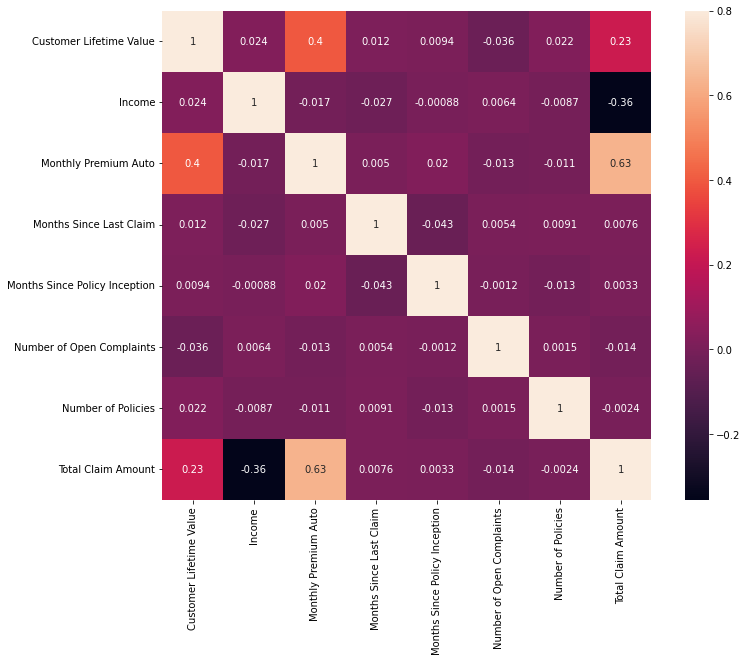

In [60]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

In [61]:
num_list=['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']
num_list

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

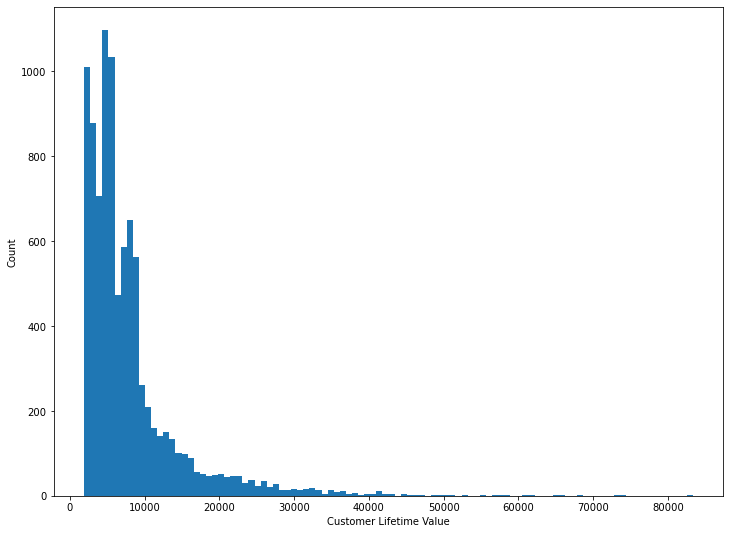

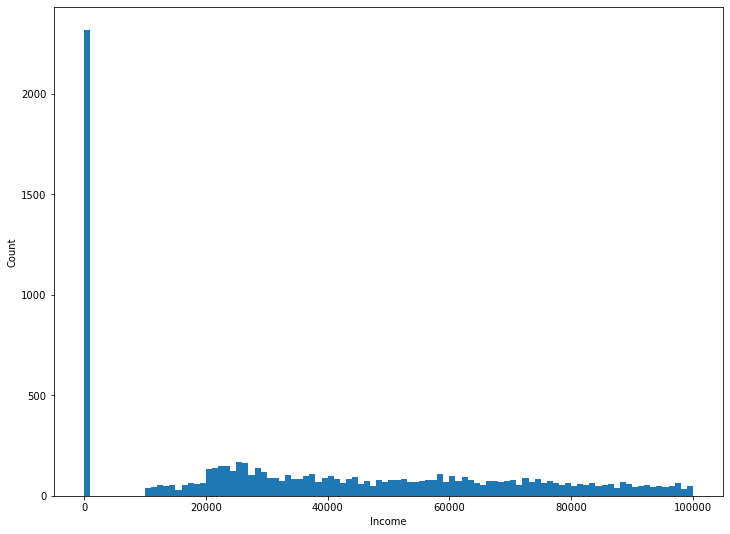

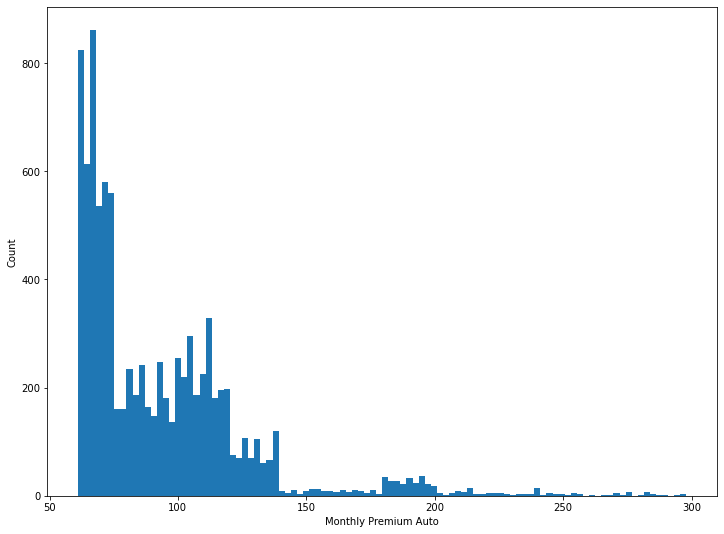

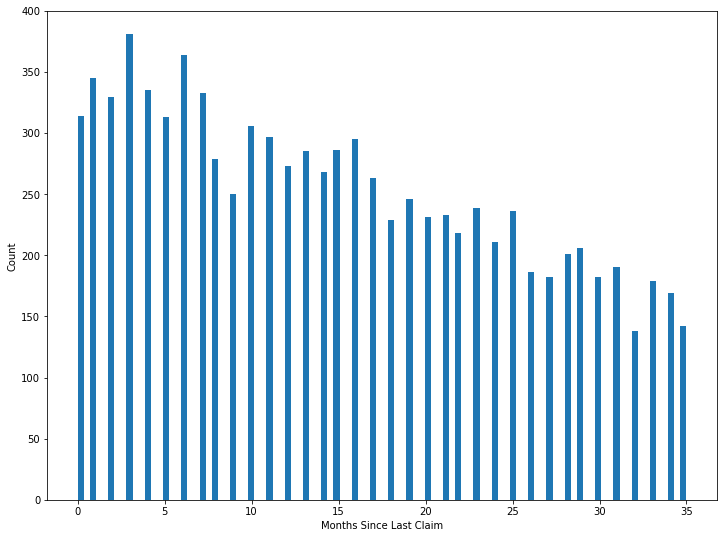

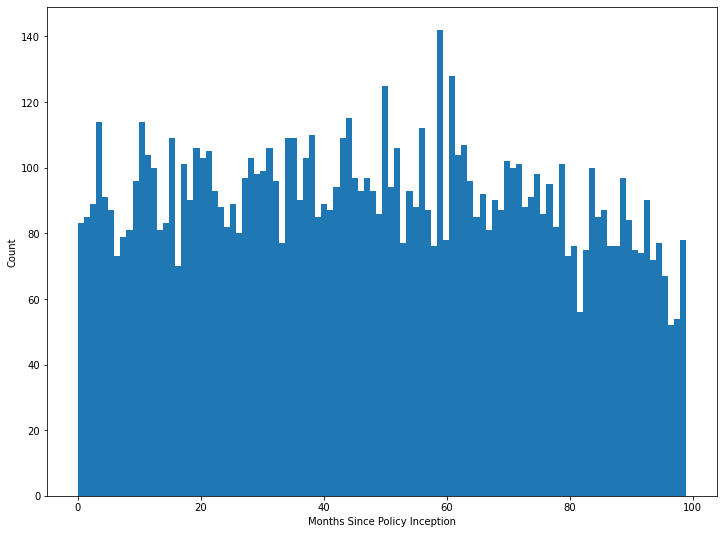

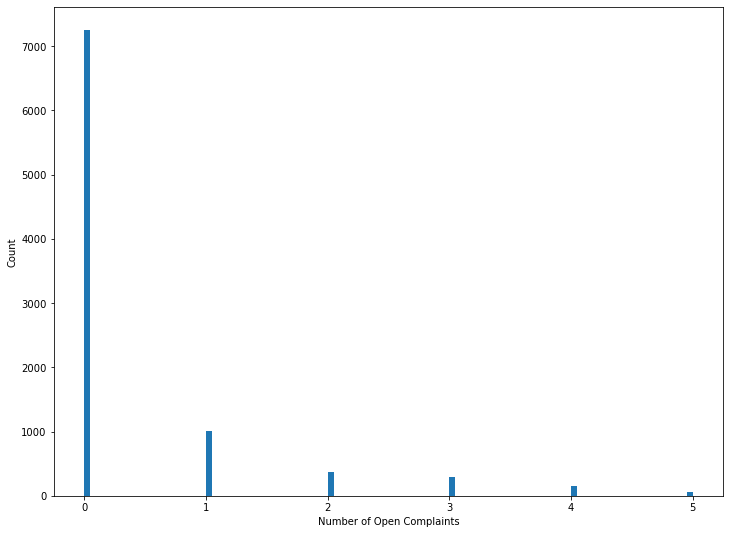

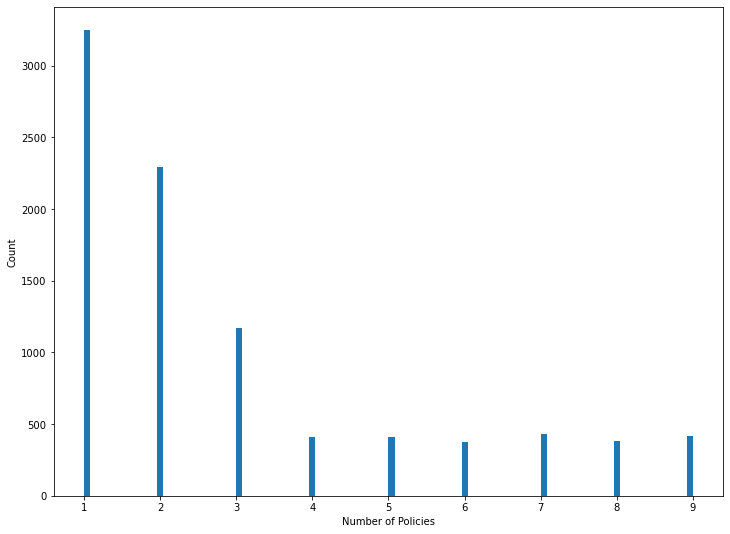

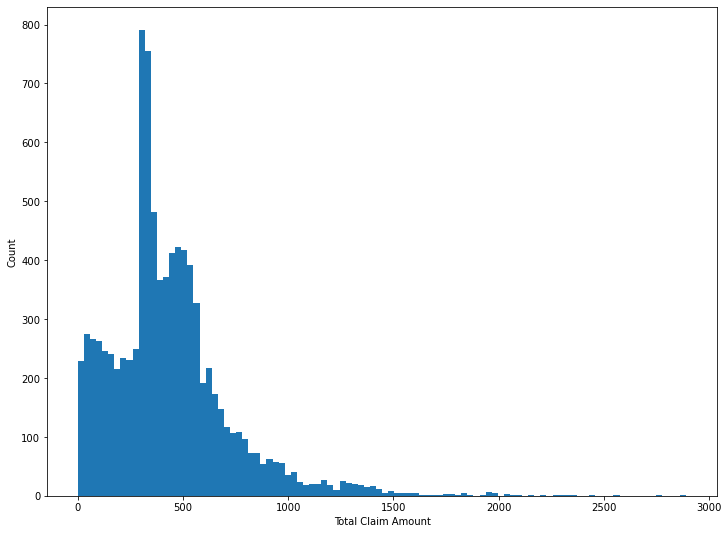

In [62]:
for i in num_list:
    plt.figure(figsize = (12, 9))
    plt.hist(df[i], bins = 100)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

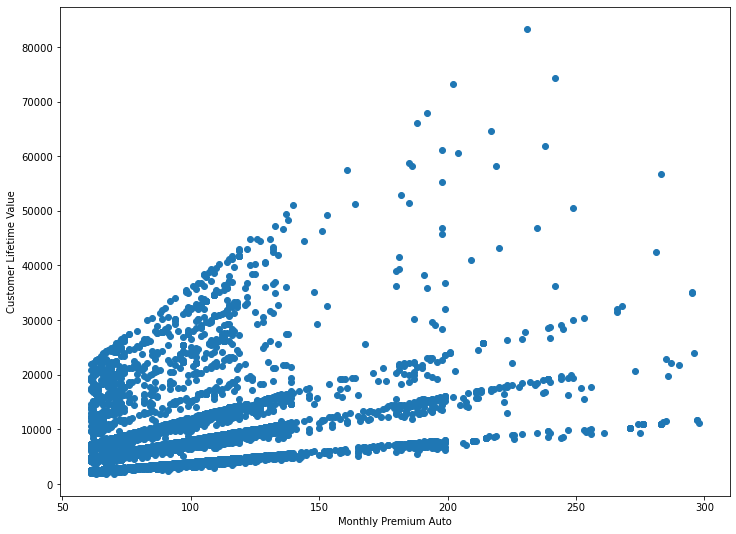

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 9))
plt.scatter(df['Monthly Premium Auto'], df['Customer Lifetime Value'])
plt.ylabel('Customer Lifetime Value')
plt.xlabel('Monthly Premium Auto')
plt.show()

In [64]:
categorical_var=['State', 'Response', 'Coverage',
       'Education', 'EmploymentStatus', 'Gender',
       'Marital Status', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size']

State
Arizona


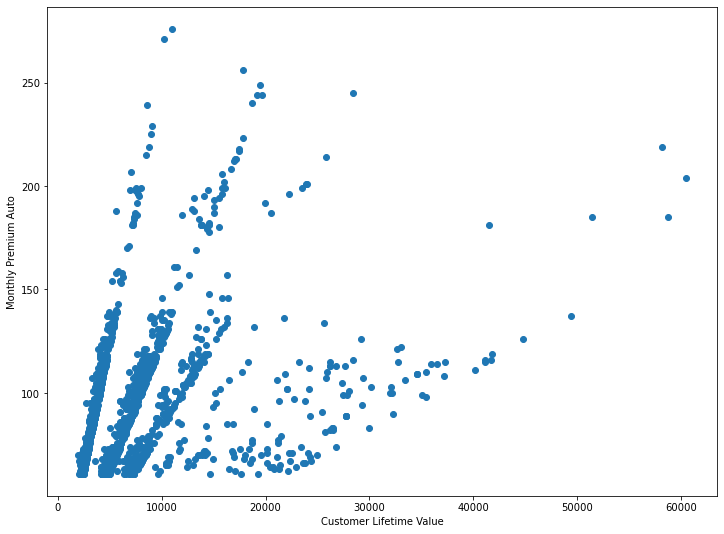

California


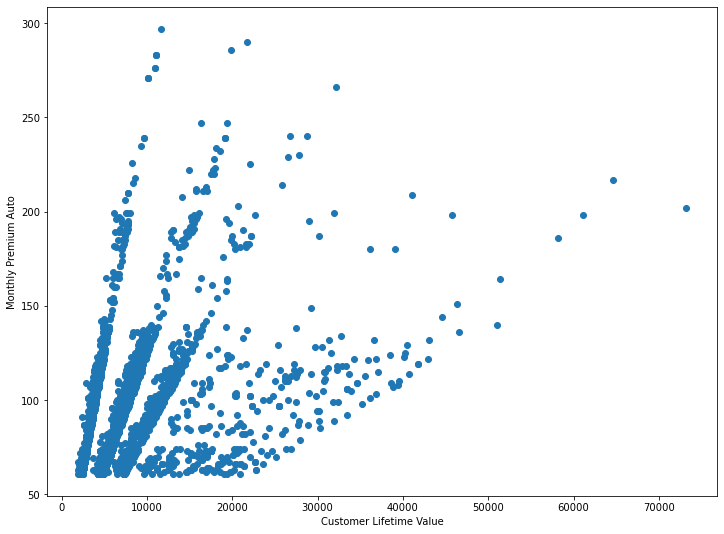

Nevada


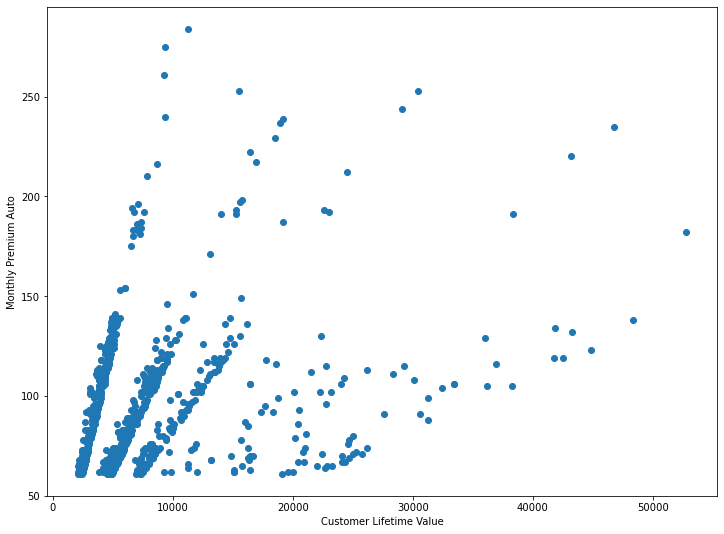

Oregon


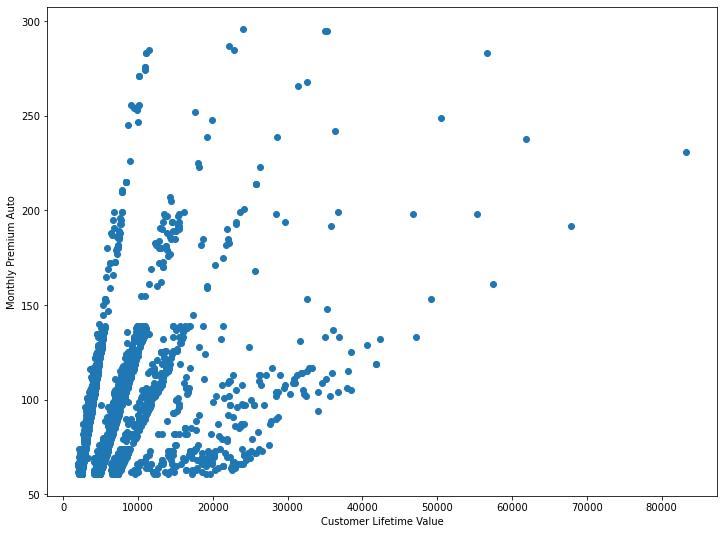

Washington


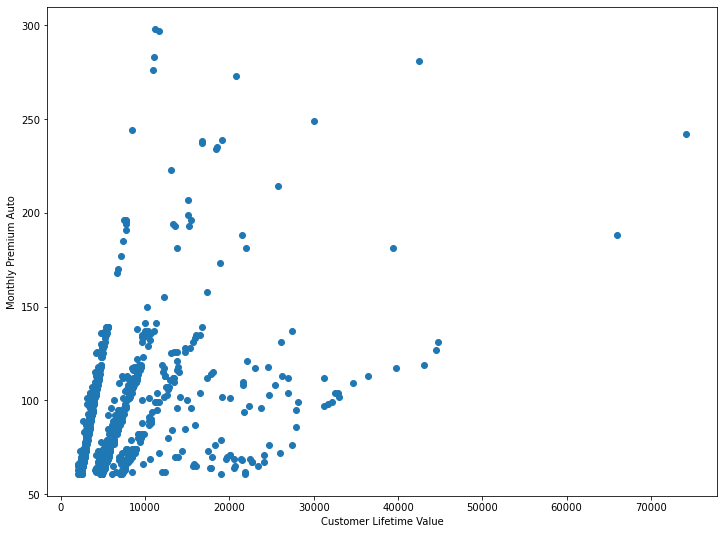

Response
No


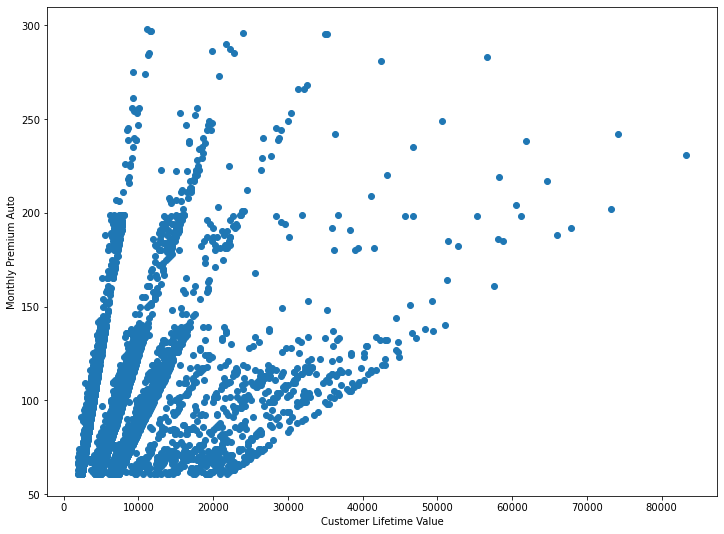

Yes


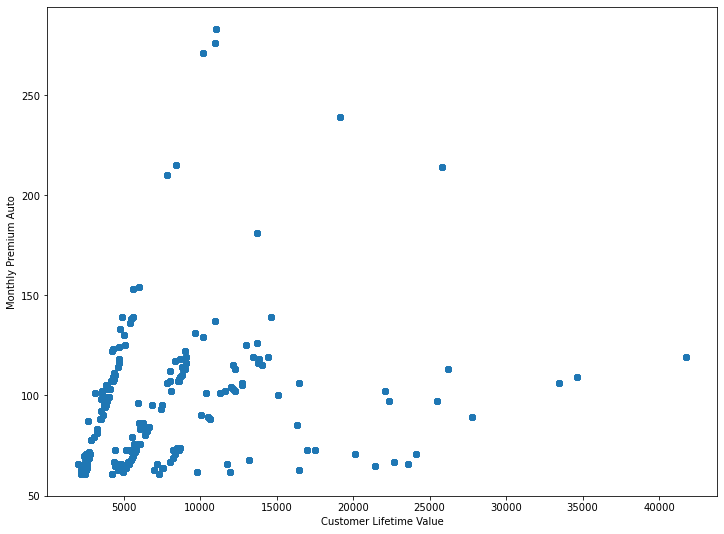

Coverage
Basic


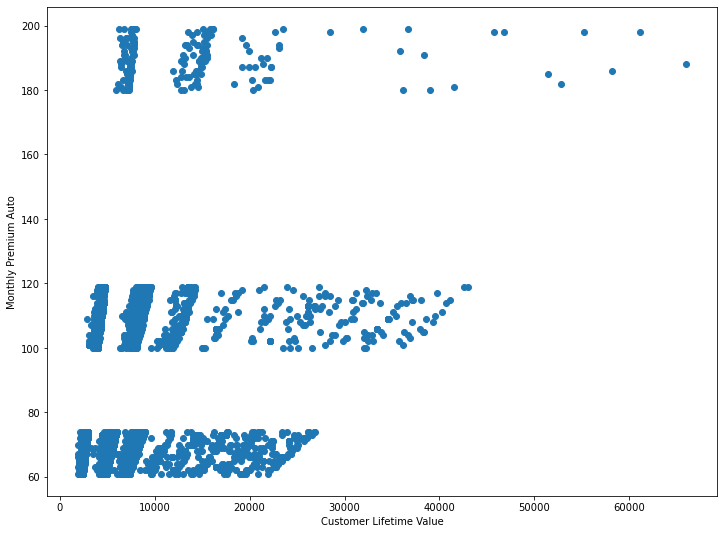

Extended


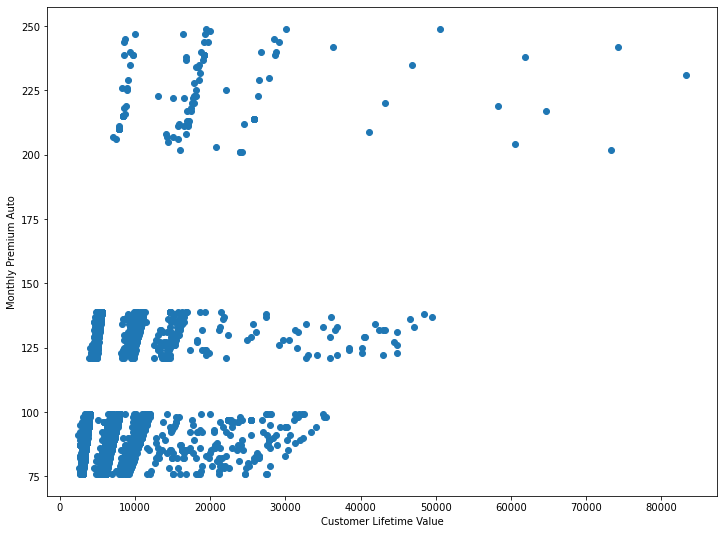

Premium


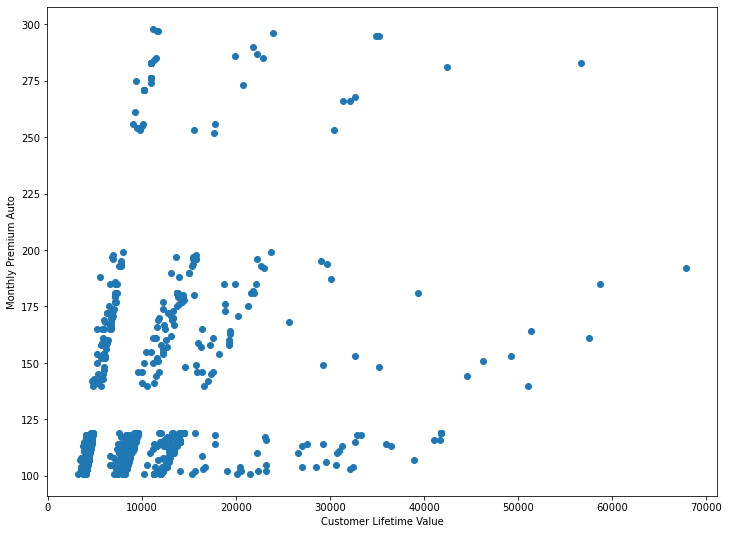

Education
Bachelor


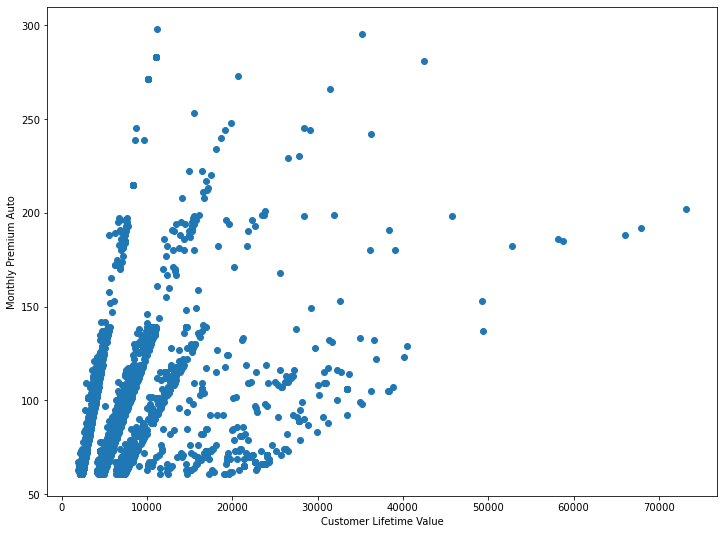

College


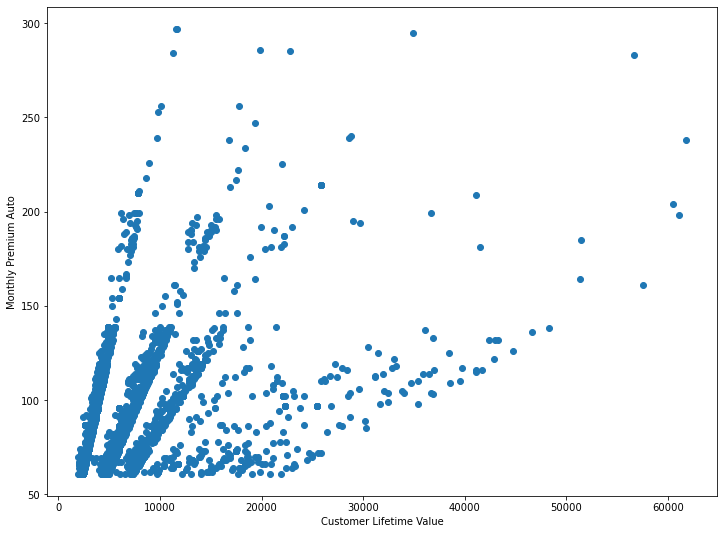

Doctor


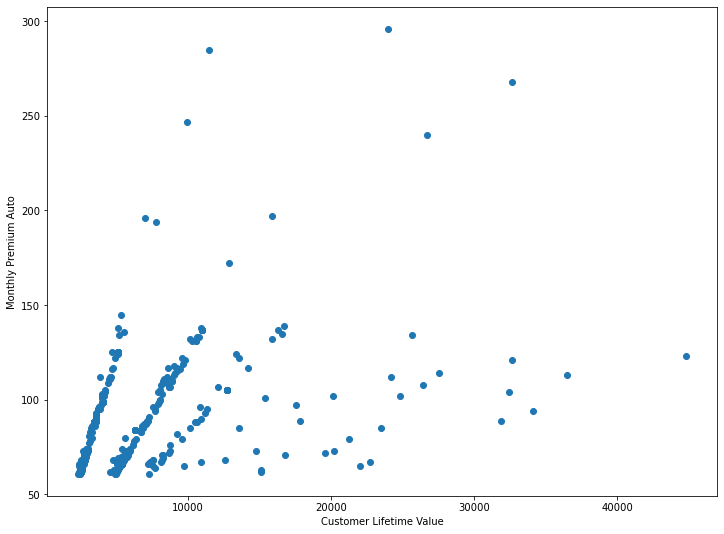

High School or Below


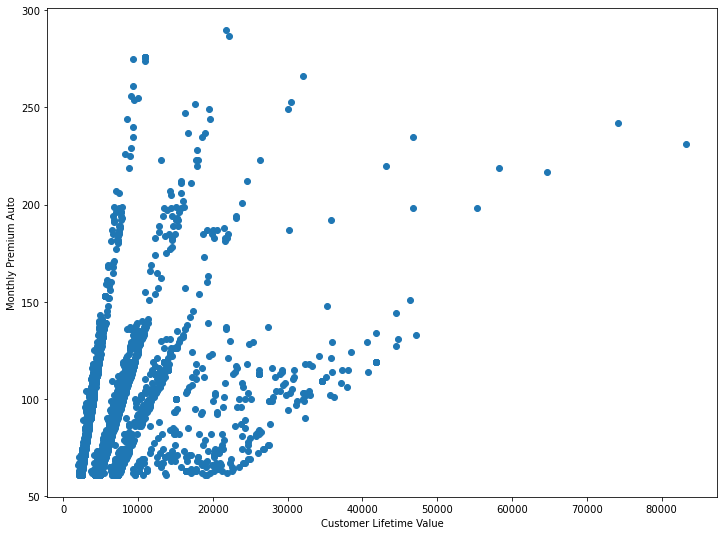

Master


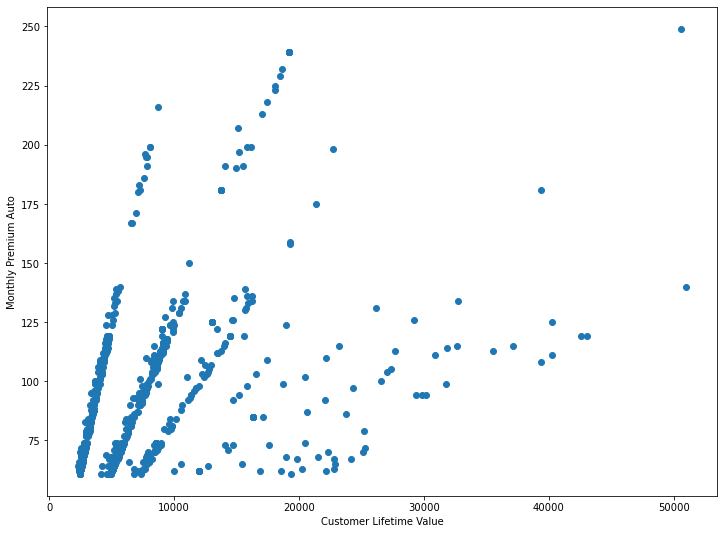

EmploymentStatus
Disabled


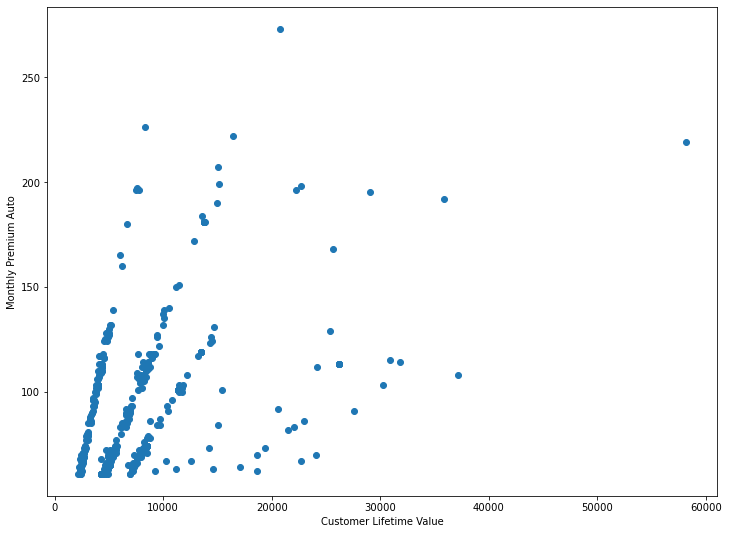

Employed


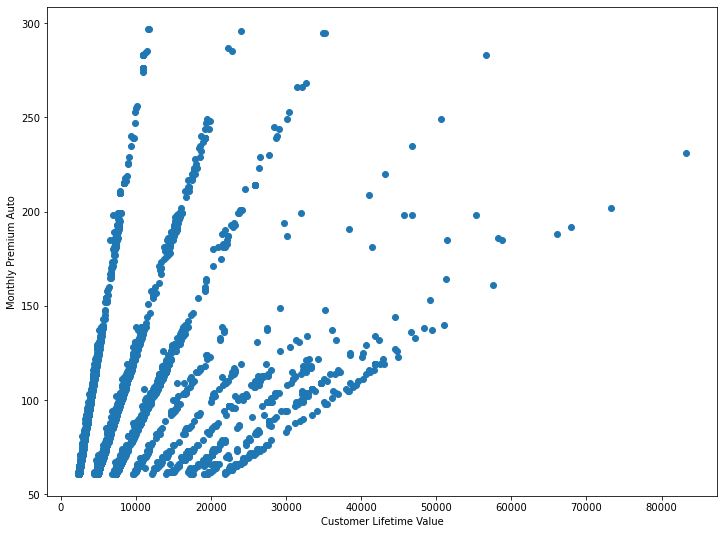

Medical Leave


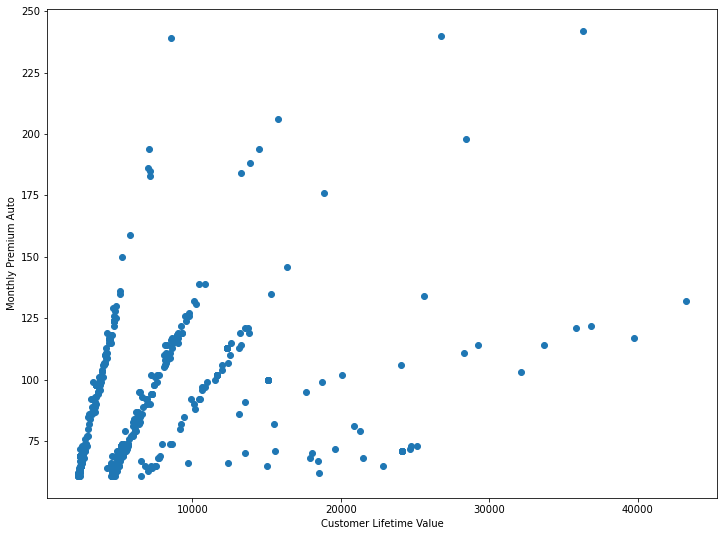

Retired


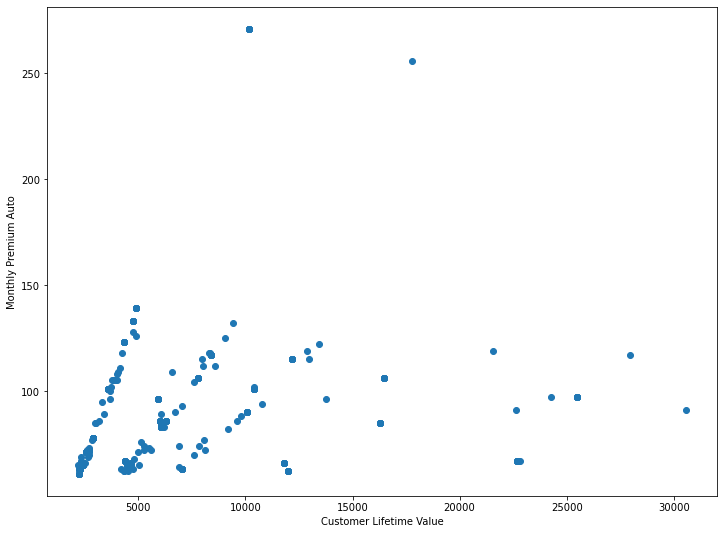

Unemployed


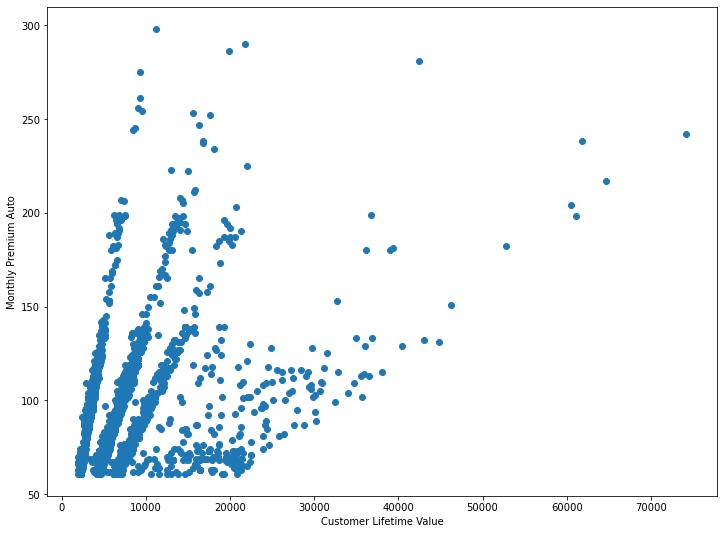

Gender
F


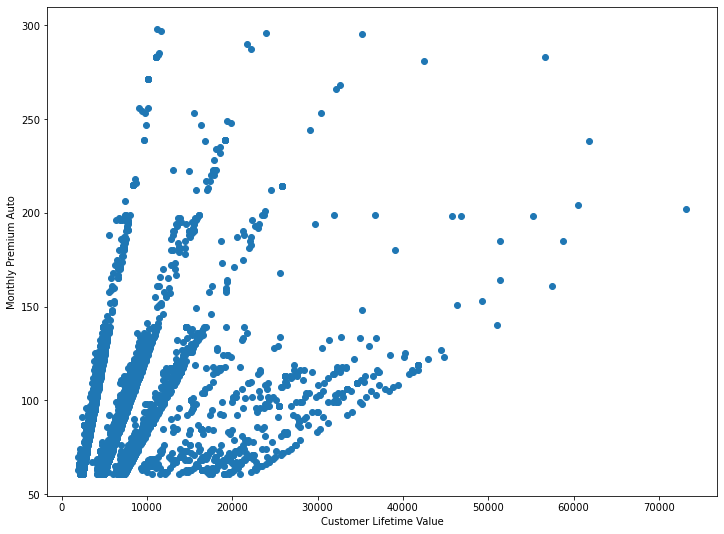

M


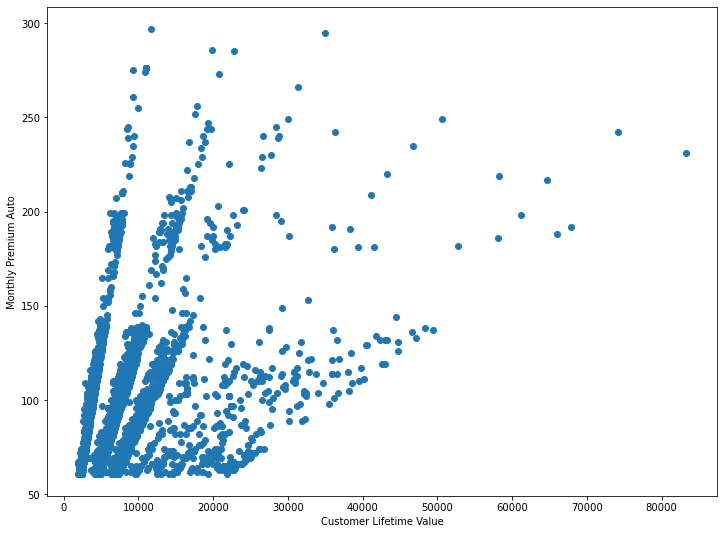

Marital Status
Divorced


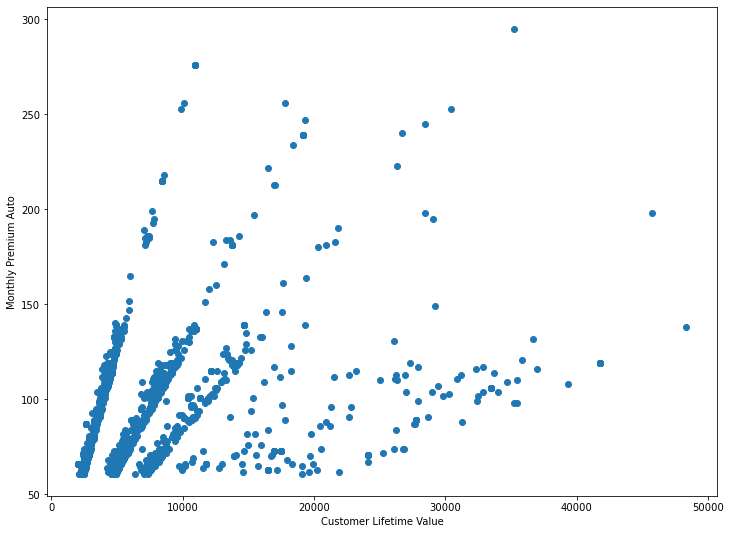

Married


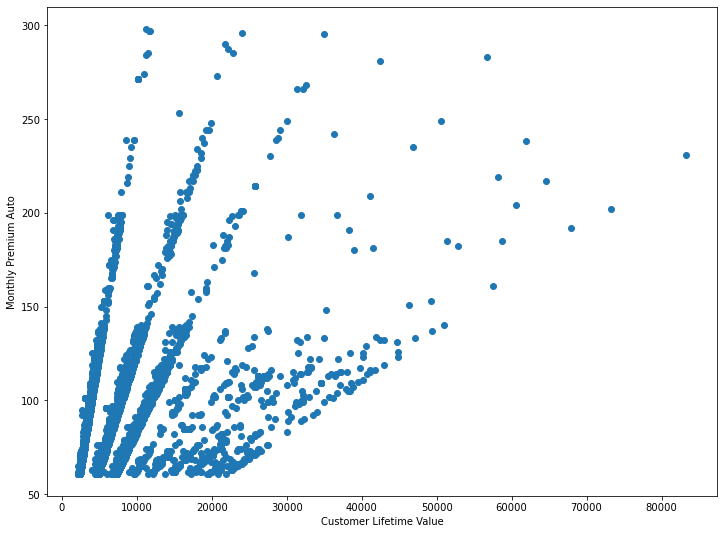

Single


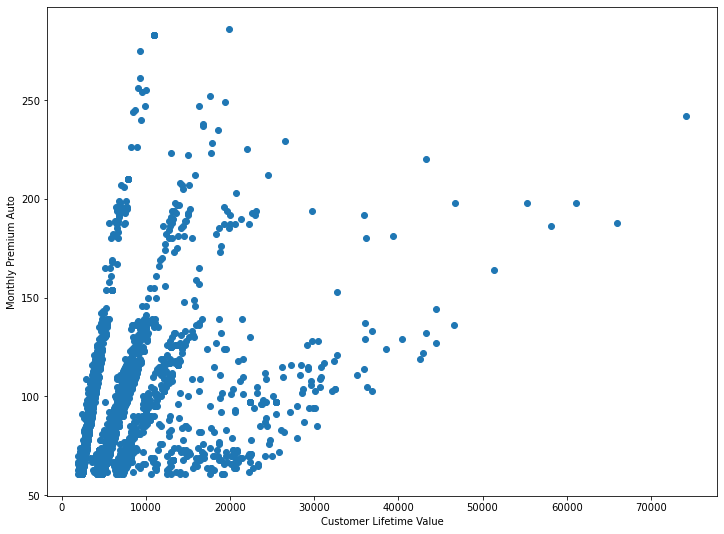

Number of Policies
1


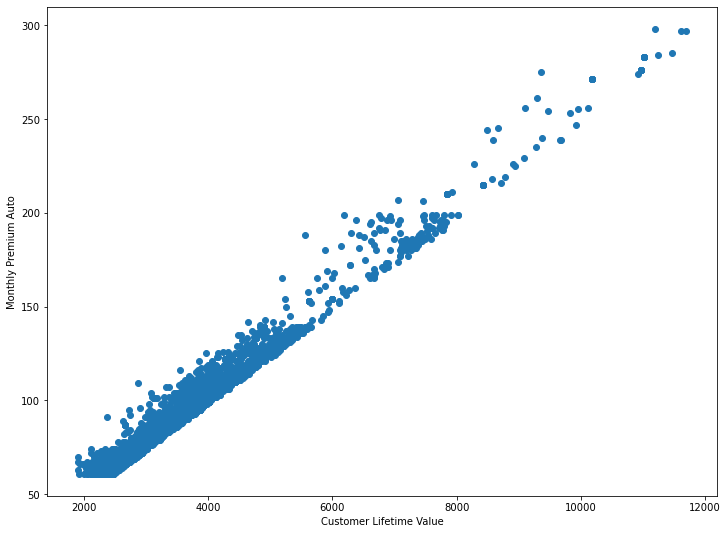

2


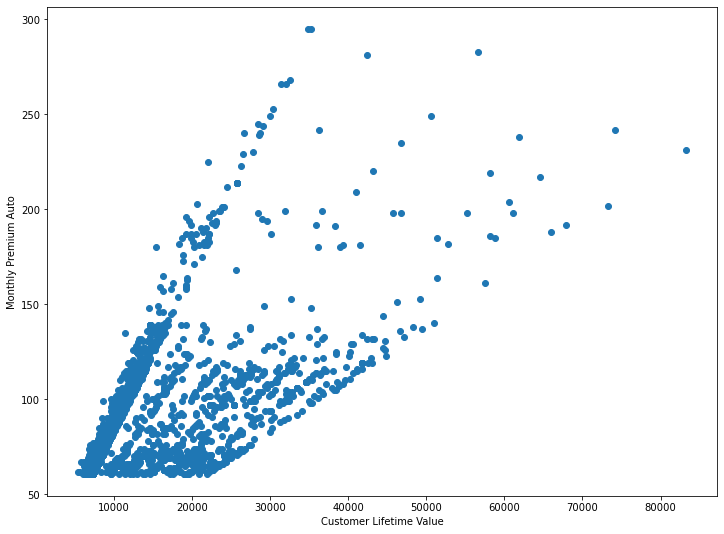

3


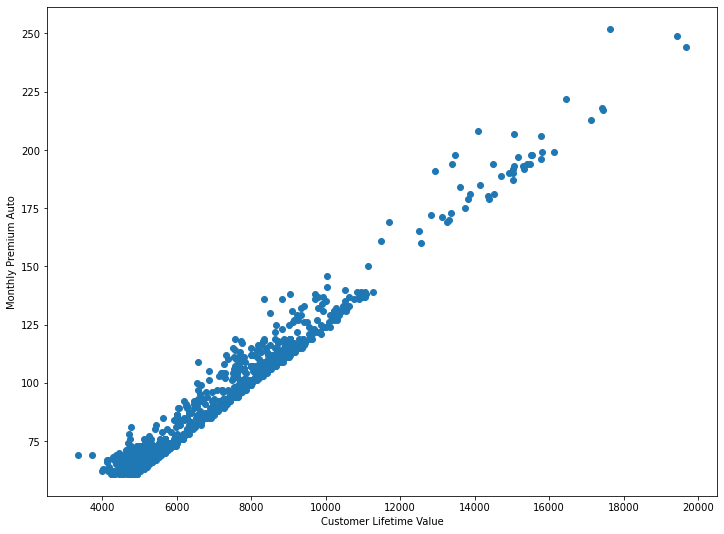

4


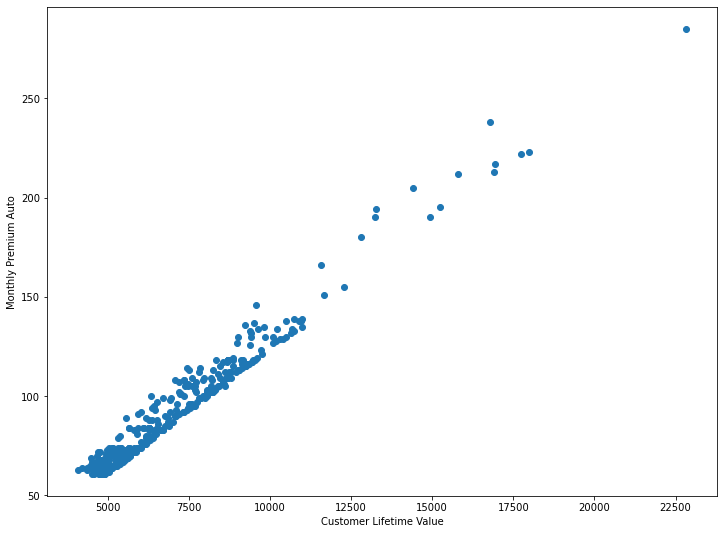

5


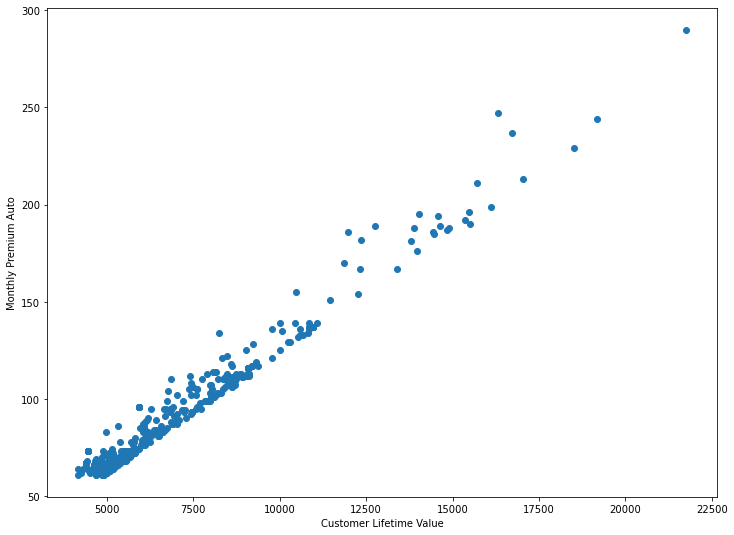

6


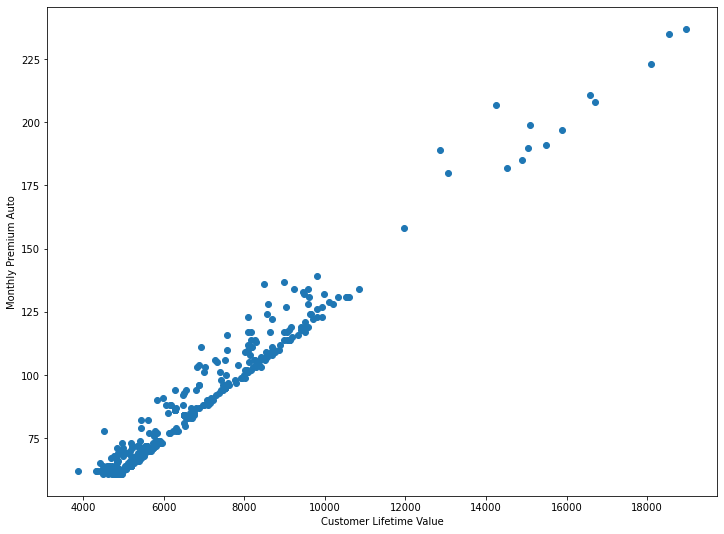

7


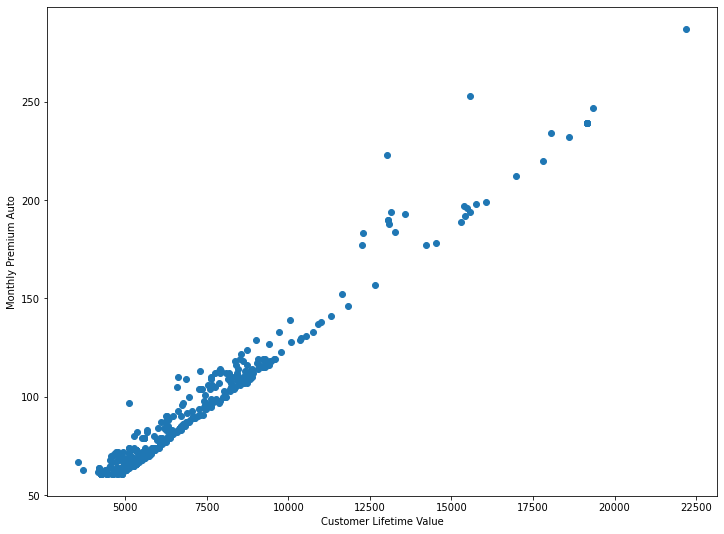

8


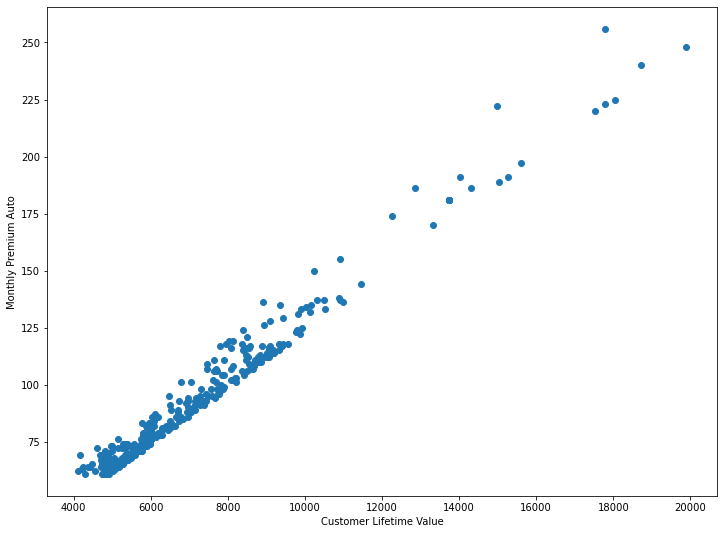

9


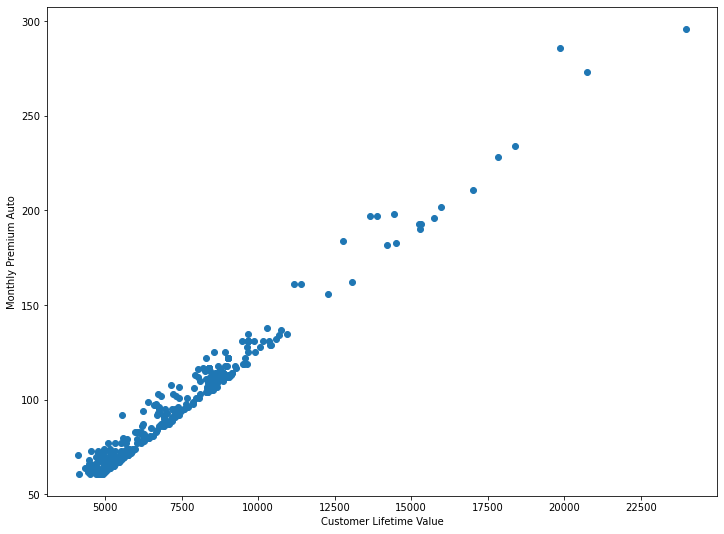

Policy Type
Corporate Auto


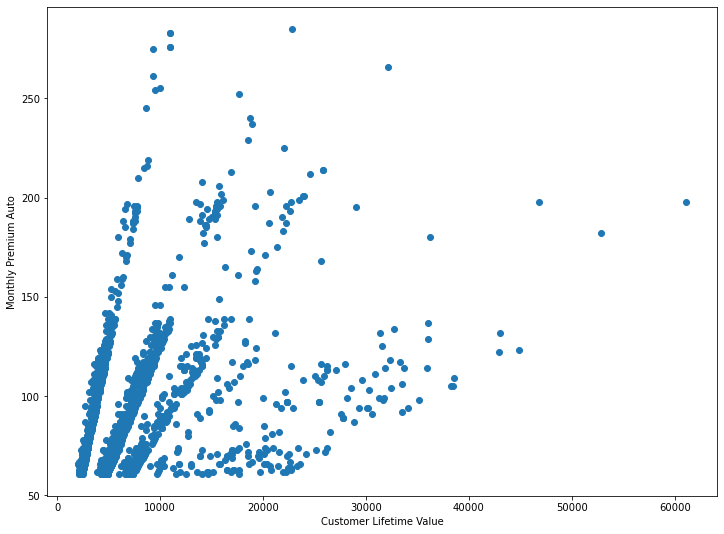

Personal Auto


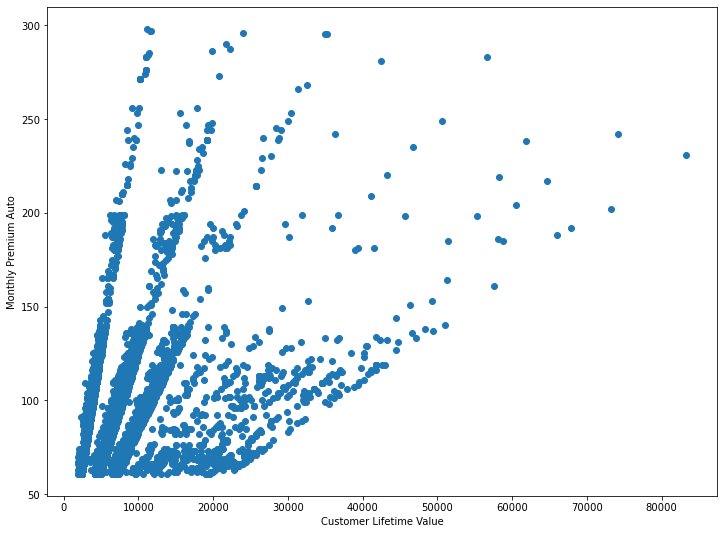

Special Auto


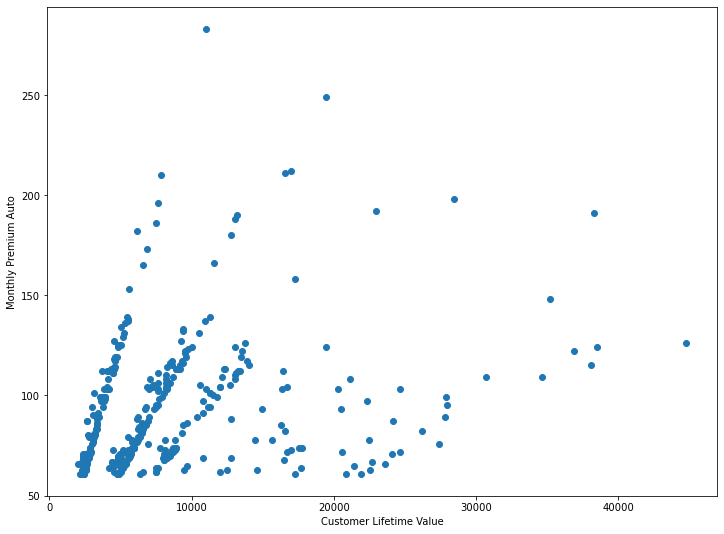

Policy
Corporate L1


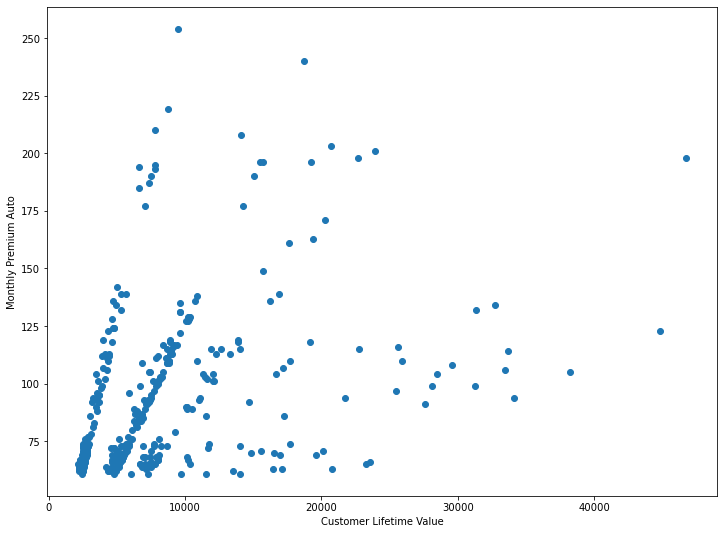

Corporate L2


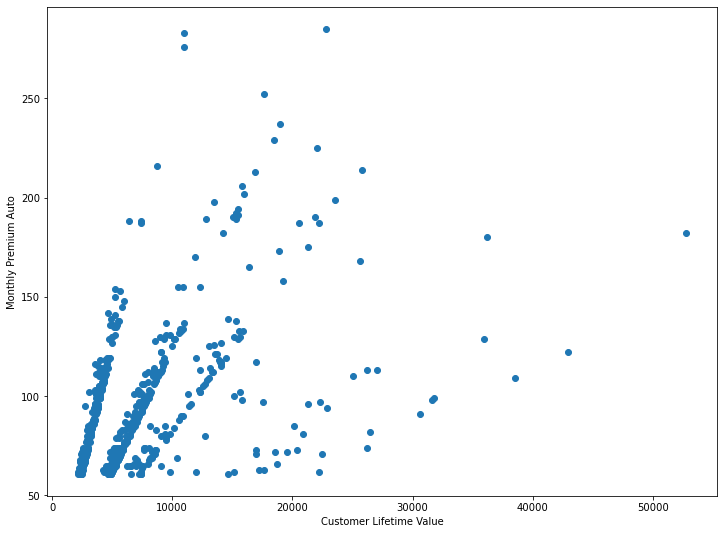

Corporate L3


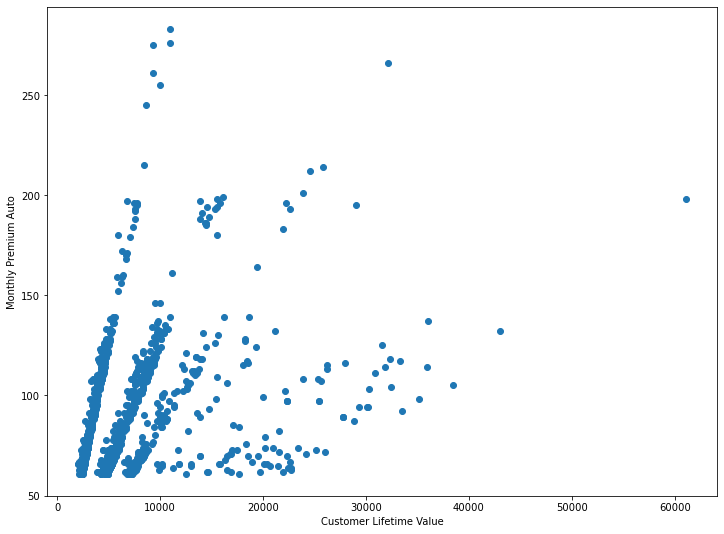

Personal L1


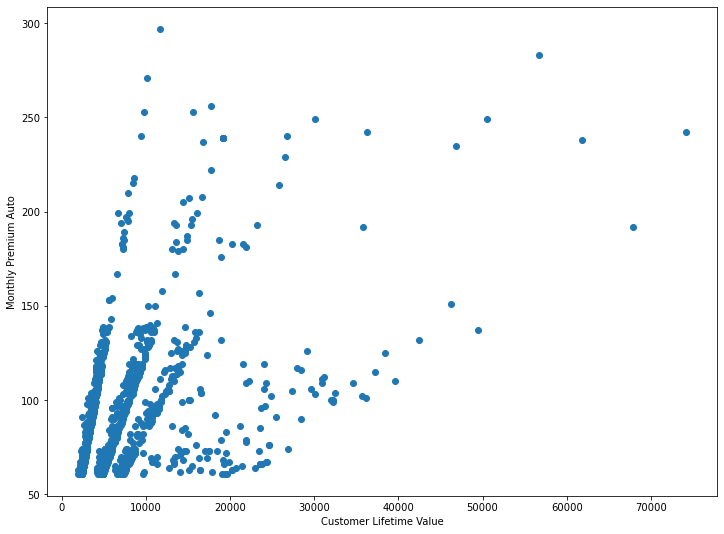

Personal L2


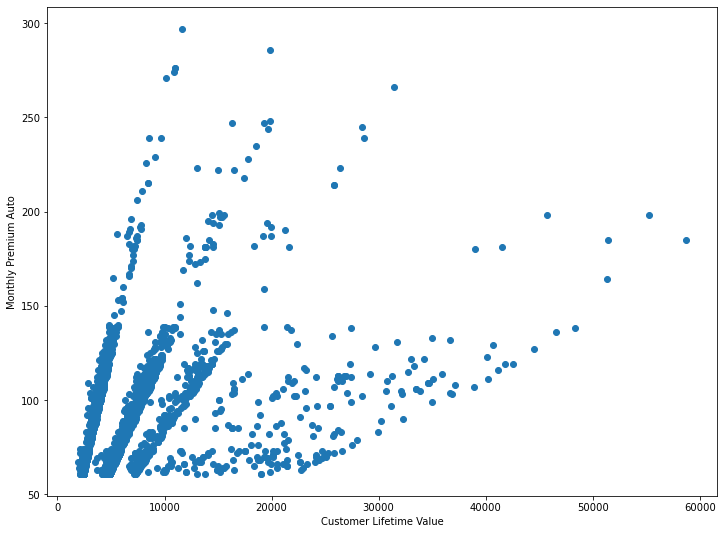

Personal L3


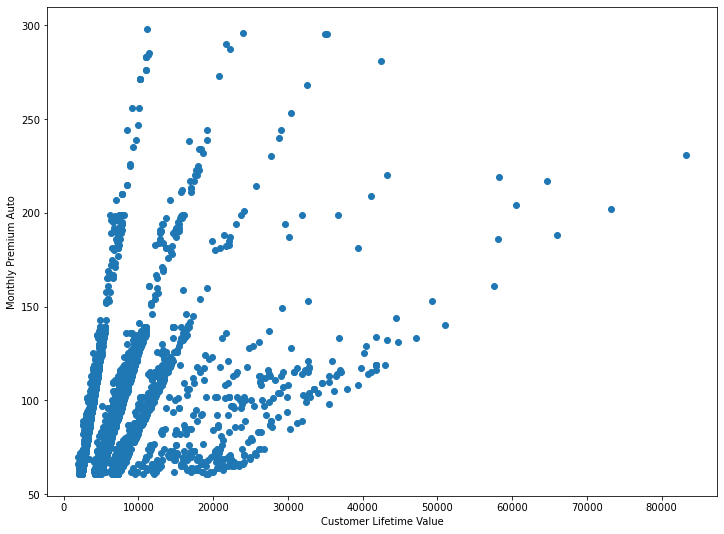

Special L1


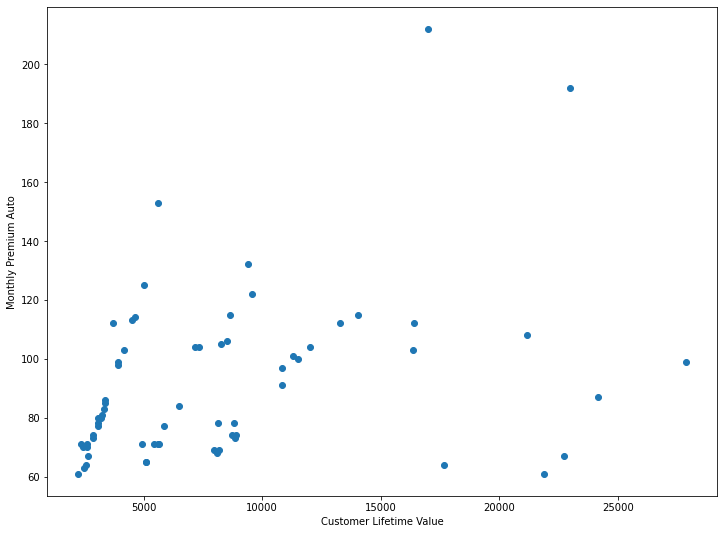

Special L2


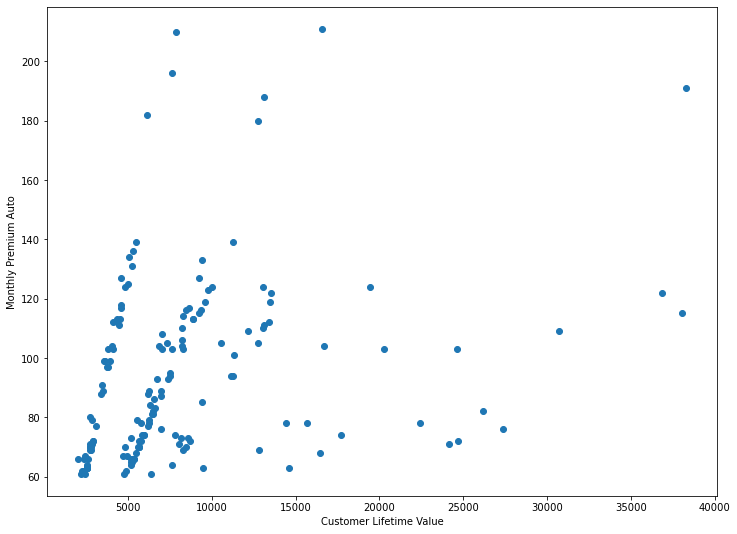

Special L3


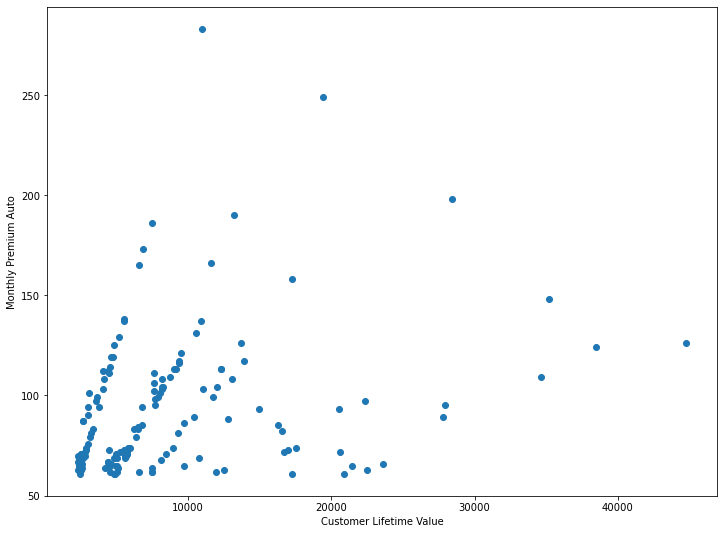

Renew Offer Type
Offer1


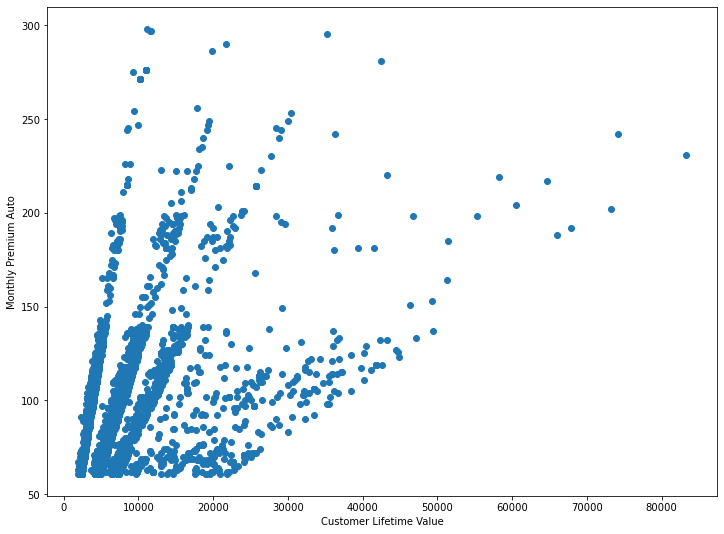

Offer2


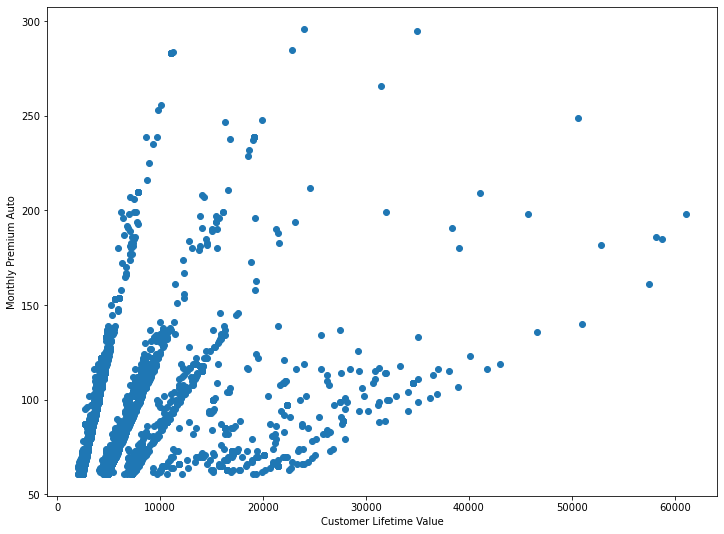

Offer3


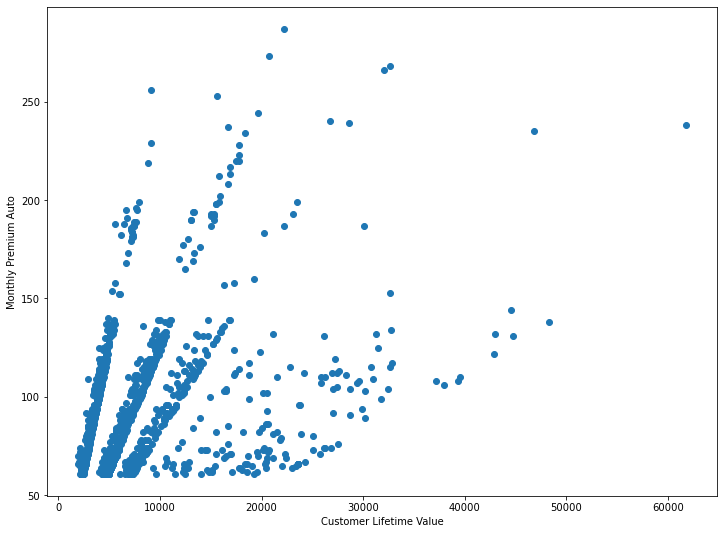

Offer4


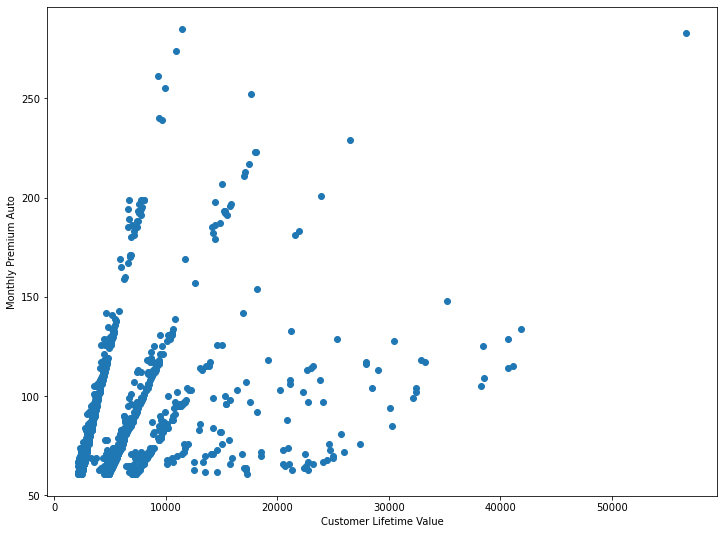

Sales Channel
Agent


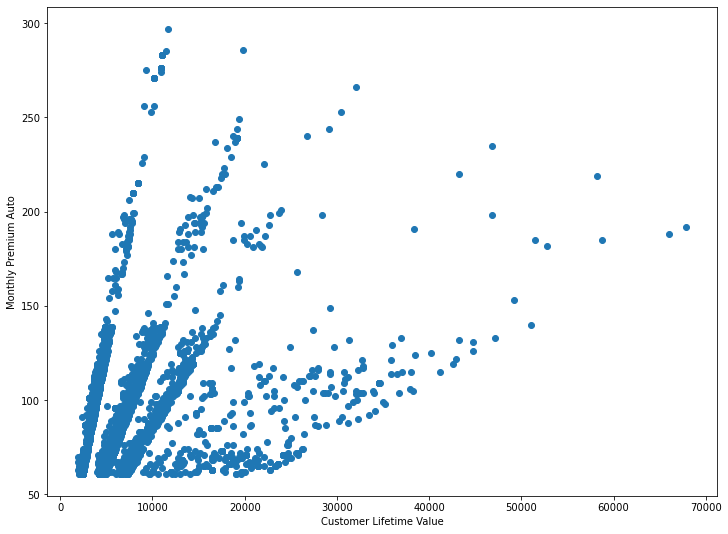

Branch


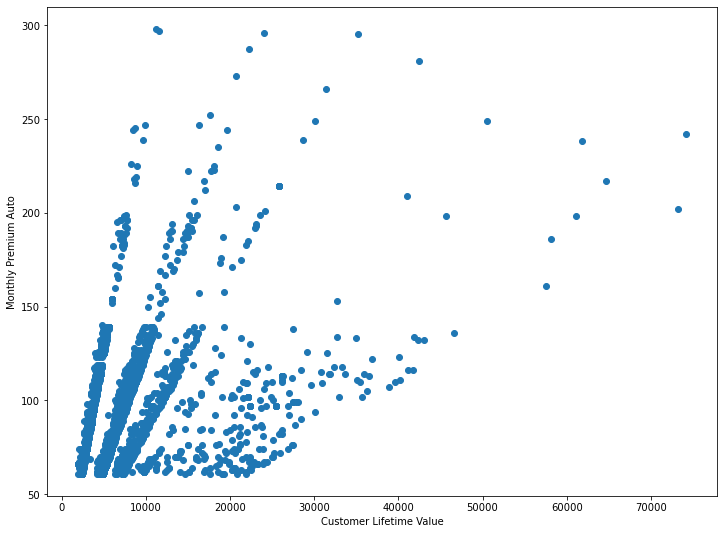

Call Center


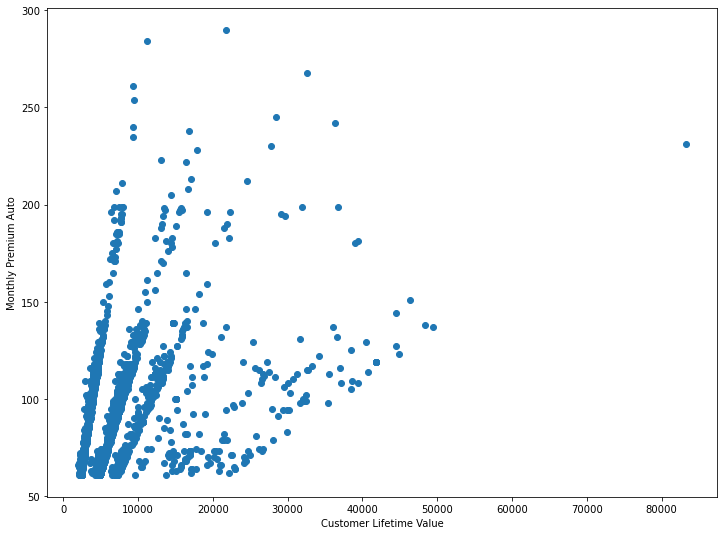

Web


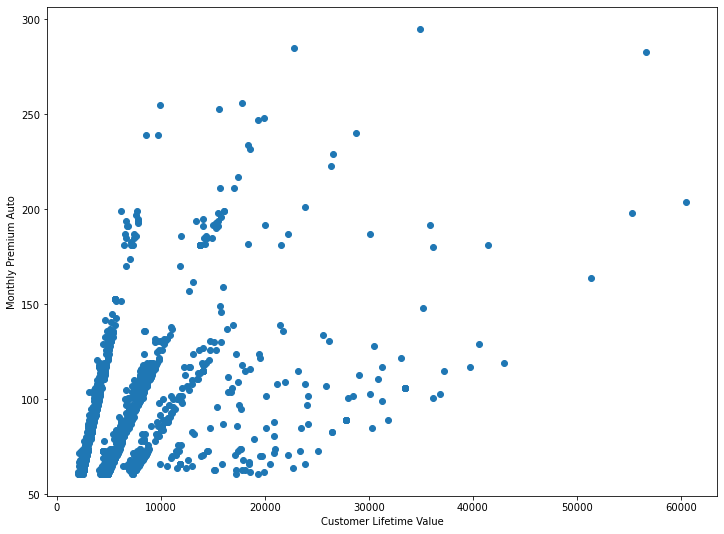

Vehicle Class
Four-Door Car


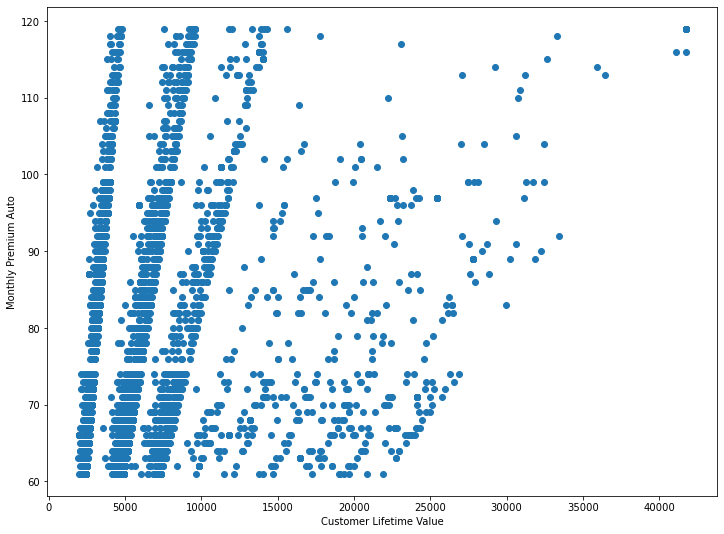

Luxury Car


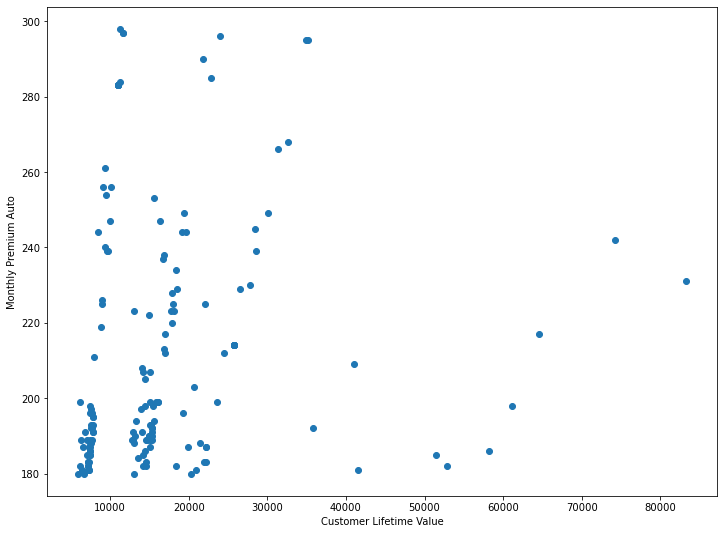

Luxury SUV


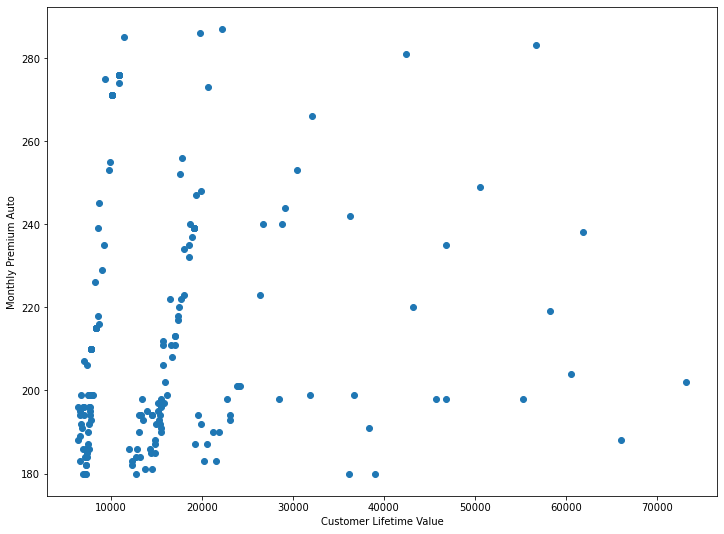

SUV


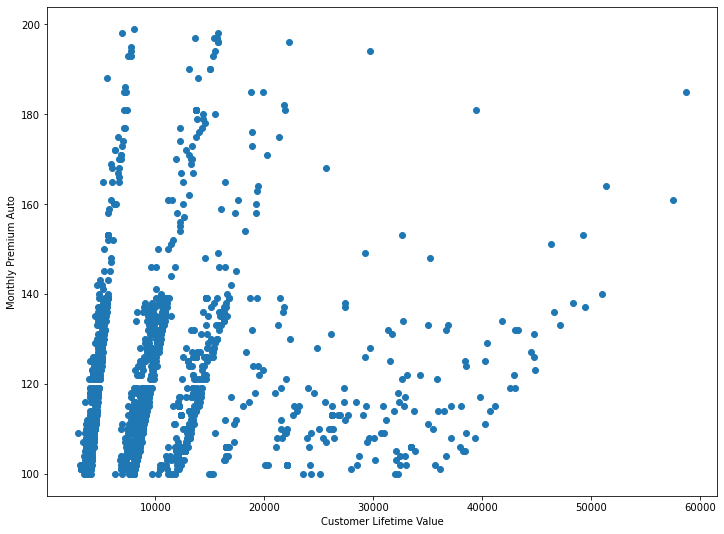

Sports Car


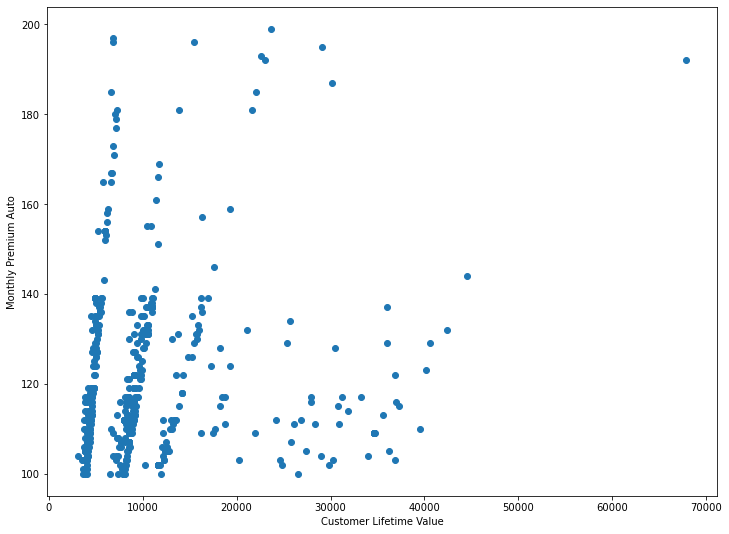

Two-Door Car


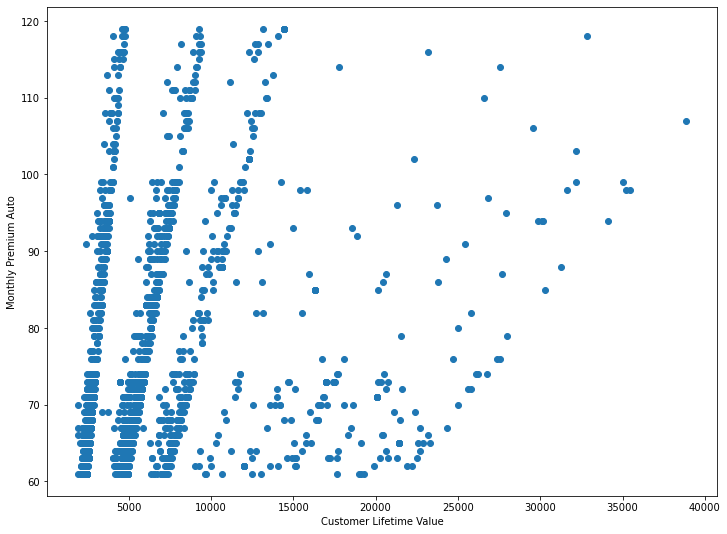

Vehicle Size
Large


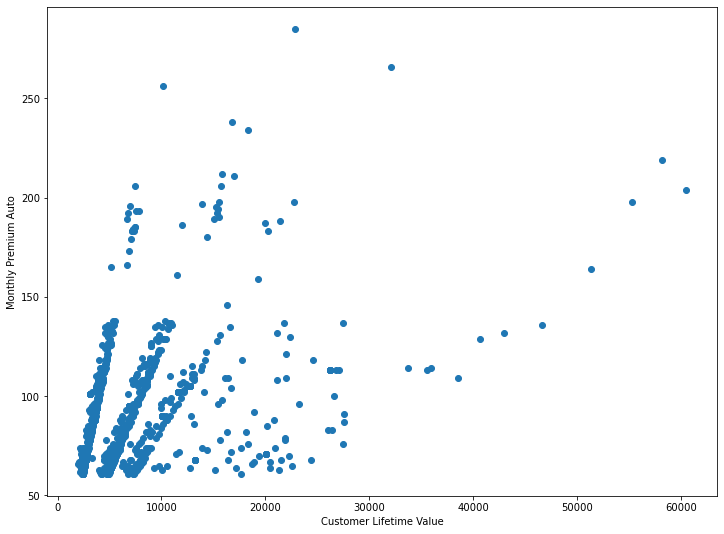

Medsize


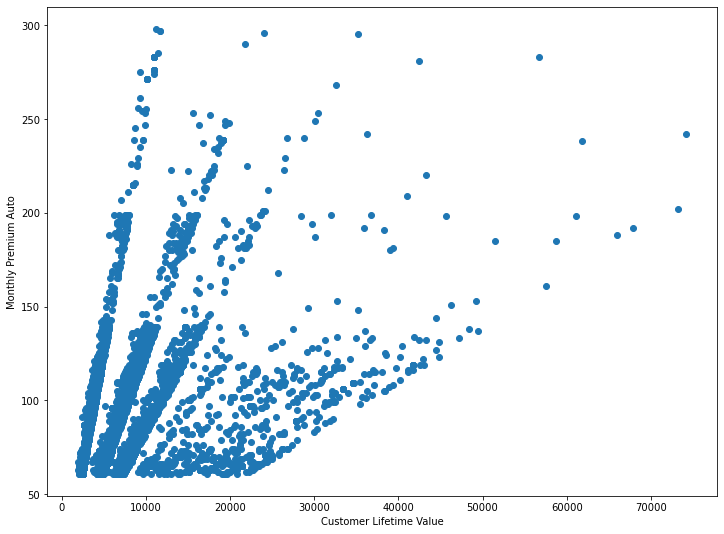

Small


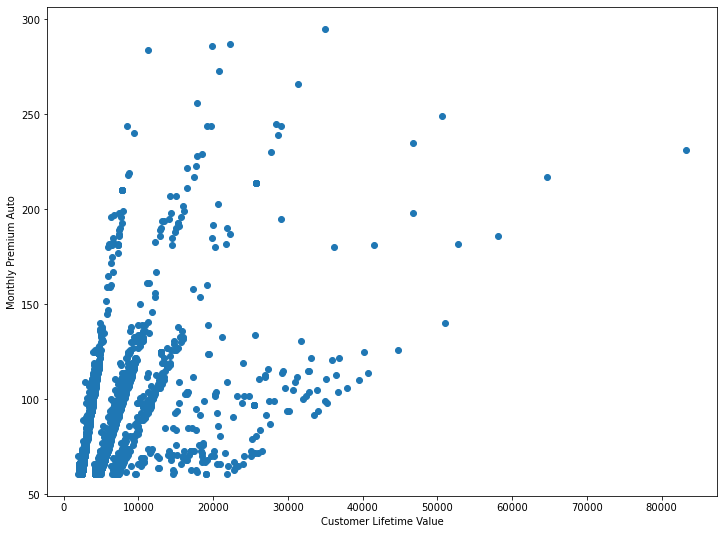

In [65]:
for i in categorical_var:
    cats=df.groupby(i)['Customer'].count()
    indx=cats.index
    print(i)
    for j in indx:
        print(j)
        plt.figure(figsize = (12, 9))
        plt.scatter(df[df[i]==j]['Customer Lifetime Value'], df[df[i]==j]['Monthly Premium Auto'])
        plt.xlabel('Customer Lifetime Value')
        plt.ylabel('Monthly Premium Auto')
        plt.show() 

In [66]:
nop=df.groupby('Number of Policies')['Customer'].count()
nop

Number of Policies
1    3251
2    2294
3    1168
4     409
5     407
6     372
7     433
8     384
9     416
Name: Customer, dtype: int64

In [67]:
nopi=nop.index


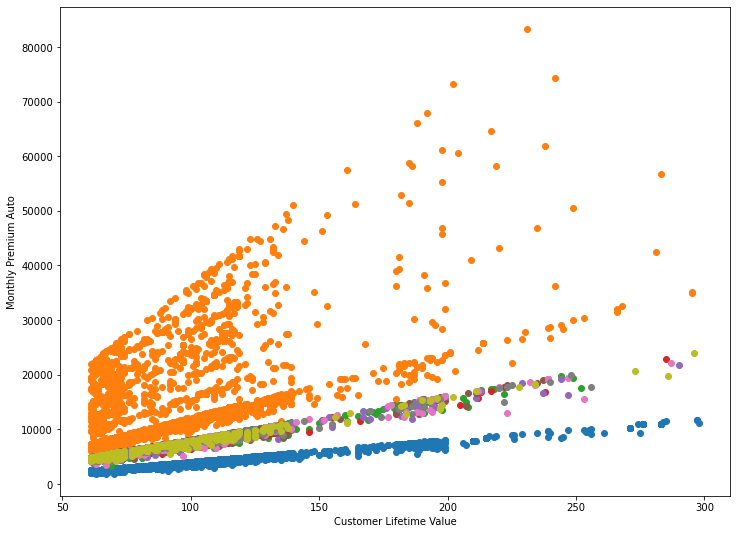

In [68]:
plt.figure(figsize = (12, 9))
for i in nopi:
    plt.scatter(df[df['Number of Policies']==i]['Monthly Premium Auto'], df[df['Number of Policies']==i]['Customer Lifetime Value'])
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Monthly Premium Auto')
plt.show()

In [72]:
X = df['Monthly Premium Auto'].values.reshape(-1,1)
y = df['Customer Lifetime Value'].values.reshape(-1,1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [75]:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[432.67220054]
[[81.74976994]]


In [76]:
y_pred = regressor.predict(X_test)

In [77]:
df_ = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_

,Actual,Predicted
0,5592.455266,6155.156097
1,2317.282049,5991.656557
2,9540.923395,10160.894824
3,8581.278701,19970.867217
4,4229.923123,10733.143214
...,...,...
1822,8343.751519,6236.905867
1823,8828.933996,9425.146894
1824,4016.541995,9506.896664
1825,5159.369746,6482.155176


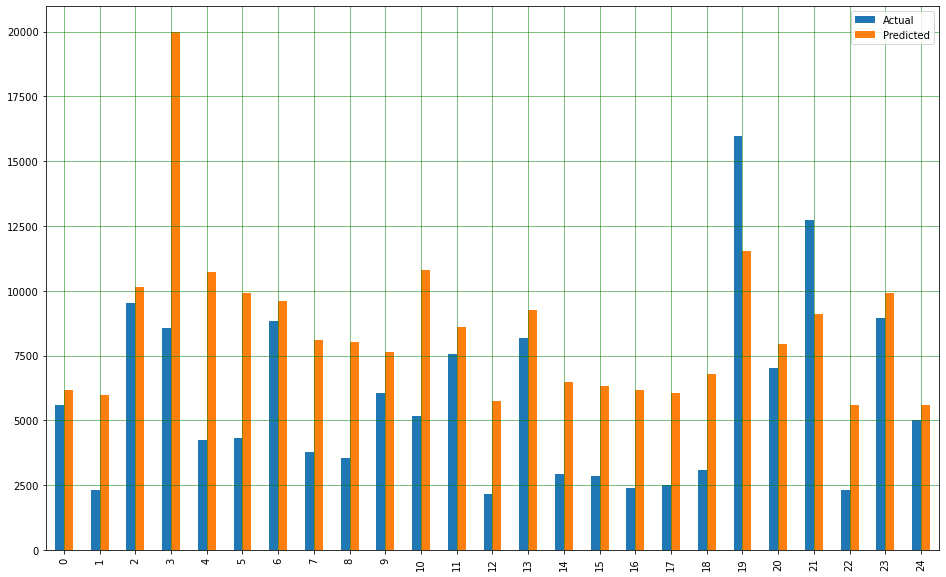

In [78]:
df1 = df_.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

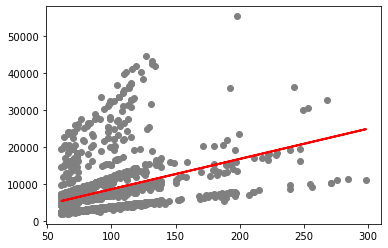

In [79]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [82]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 6123.717820331538


In [83]:
df_pol_1=df[df['Number of Policies']==1]
df_pol_1

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
16,FV94802,Nevada,2566.867823,No,Basic,High School or Below,2/6/11,Medical Leave,M,25049,...,7,0,1,Personal Auto,Personal L3,Offer2,Call Center,454.245098,Two-Door Car,Medsize
17,OE15005,California,3945.241604,No,Basic,College,1/5/11,Medical Leave,M,28855,...,59,0,1,Personal Auto,Personal L2,Offer3,Call Center,647.442031,SUV,Medsize
20,ZK25313,Oregon,2872.051273,No,Basic,High School or Below,2/19/11,Employed,M,57749,...,21,0,1,Personal Auto,Personal L2,Offer1,Branch,355.200000,Two-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9120,RN61682,California,2114.738469,No,Basic,Bachelor,2/19/11,Unemployed,F,0,...,69,5,1,Personal Auto,Personal L2,Offer3,Web,518.400000,Four-Door Car,Medsize
9121,BB10681,California,4140.648654,No,Extended,College,1/17/11,Unemployed,F,0,...,35,2,1,Corporate Auto,Corporate L3,Offer1,Branch,590.400000,SUV,Medsize
9128,YM19146,California,4100.398533,No,Premium,College,1/6/11,Employed,F,47761,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize


In [84]:
X = df_pol_1['Monthly Premium Auto'].values.reshape(-1,1)
y = df_pol_1['Customer Lifetime Value'].values.reshape(-1,1)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [86]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [87]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[2.66419826]
[[38.21242128]]


In [88]:
y_pred = regressor.predict(X_test)


In [89]:
df_ = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_

,Actual,Predicted
0,2442.422113,2333.621896
1,7475.784971,7492.298769
2,4883.335068,4702.792016
3,2178.520191,2486.471581
4,2243.473907,2371.834318
...,...,...
646,4811.184482,5199.553492
647,3546.400212,3938.543590
648,2889.087654,2792.170952
649,3095.175379,2945.020637


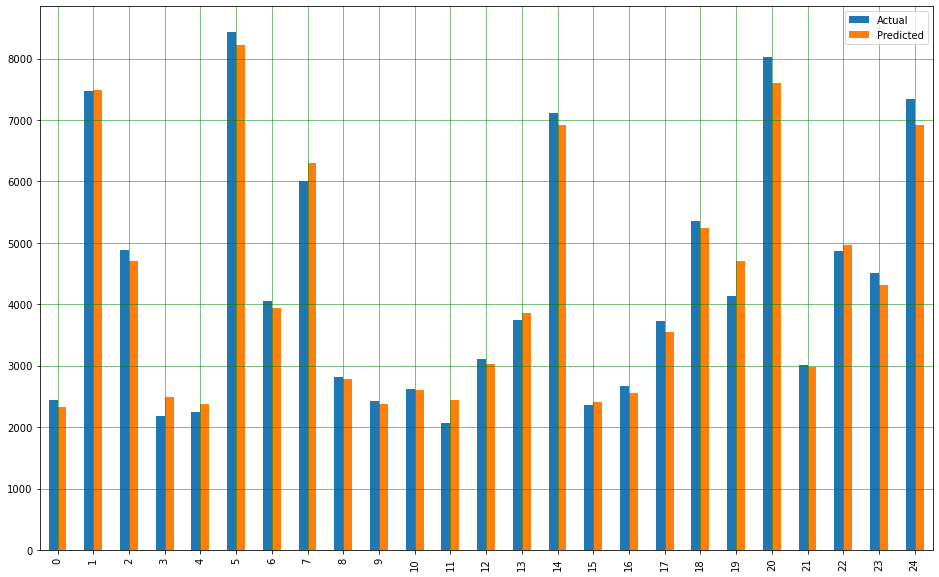

In [90]:
df1 = df_.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

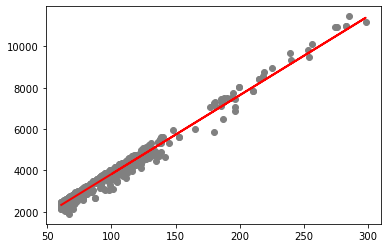

In [91]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [93]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 206.45131196713697
